# **Data Jobs Salaries in November 2023 in Mexico** (Part 2)
____


Author: **Daniel Eduardo López**

<font size="-1"><a href="https://www.linkedin.com/in/daniel-eduardo-lopez">LinkedIn</a> | <a href="https://github.com/DanielEduardoLopez">GitHub </a></font>

**26 December 2023**

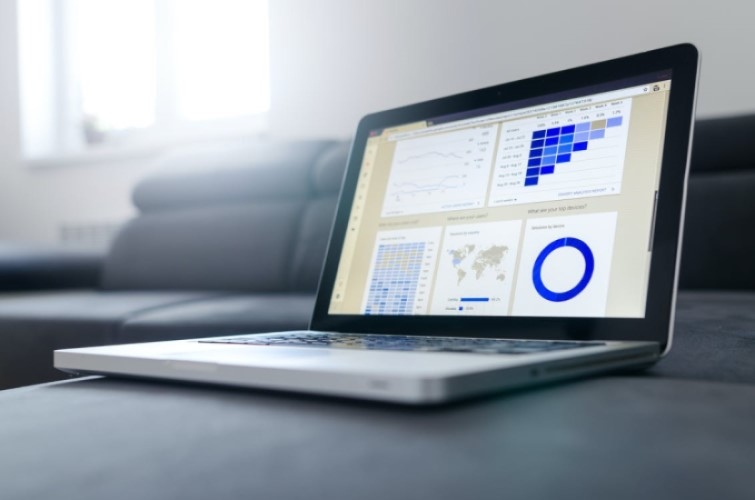

<font size="-1">Image Credit: <a href="https://www.pexels.com/es-es/foto/foto-de-primer-plano-del-portatil-gris-577210/"> Lukas </a> from <a href="https://www.pexels.com/"> Pexels</a>.</font>

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1 [Background](#background)<br>
    1.2 [General Objective](#general_objective)<br>
    1.3 [Research Question](#question)<br>
    1.4 [Hypothesis](#hypothesis)<br>
    1.5 [Abridged Methodology](#methodology)<br>
    1.6 [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Exploration**](#exploration)<br>
    3.1 [Data Description](#description)<br>
    3.2 [Data Quality](#quality)<br>
    3.3 [Exploratory Data Analysis (EDA)](#eda)<br>
4. [**Data Preparation**](#preparation)<br>
    4.1 [Drop of Duplicates](#duplicates)<br>
    4.2 [Cleaning of the Attribute Job](#clean_job)<br>
    4.3 [Cleaning of the Attribute Company](#clean_company)<br>
    4.4 [Cleaning of the Attribute Location](#clean_location)<br>
    4.5 [Cleaning of the Attribute Salary](#clean_salary)<br>
    4.6 [Processed Dataset Exporting](#exporting)<br>
    4.7 [Salary Dataset](#salary_data)<br>
5. [**Data Analysis & Visualization**](#analysis)<br>
    5.1 [What is the most demanded data job?](#most_demanded_data_job)<br>
    5.2 [Where do the most data jobs locate?](#data_jobs_location)<br>
    5.3 [How is the data jobs demand per location?](#demand_per_location)<br>
    5.4 [What are the companies demanding more data jobs?](#top_companies_demand)<br>
6. [**Statistical Analysis**](#statistics)<br>
7. [**Conclusions**](#conclusions)<br>
8. [**References**](#references)<br>

___
## **1. Introduction** <a class="anchor" id="intro"></a>
___

### **1.1 Background** <a class="anchor" id="background"></a>
With the emergence of the big data, new jobs have appeared demanding new sets of skills and expertise for extracting value from data (Axis Talent, 2020; ai-jobs.net, 2023):

- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)
- Business Intelligence Analysts (BI)
- Machine Learning Engineers (ML)

Which one is the most valued in the Mexican labor market currently?

### **1.2 General Objective** <a class="anchor" id="general_objective"></a>
To identify which data job category has the highest salary in the Mexican labor market in November 2023 according to the OCC website.

### **1.3 Research Question** <a class="anchor" id="question"></a>
Which data job category has the highest salary in the Mexican labor market in November 2023 according to the OCC website?

### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>
The **Data Scientist** position has the highest salary in the Mexican labor market in November 2023 according to the OCC website.

### **1.5 Abridged Methodology** <a class="anchor" id="methodology"></a>
The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1. **Analytical approach**: Descriptive and inferential statistics.
2. **Data requirements**: Data about job positions such as job name, salary, company and location.
3. **Data collection**: Data was collected from the OCC Website (Mexico) on 26 November 2023, through web scraping with Python 3 and its libraries Selenium, BeautifulSoup, and Regex.
4. **Data exploration**: Data was explored with Python 3 and its libraries Pandas and Seaborn.
5. **Data preparation**: Data then was cleaned and wrangled with Python 3 and its libraries Numpy and Pandas. 
6. **Data analysis and visualization**: Data was analyzed with Python 3 and its libraries Pandas, Scipy and Statsmodels and visualized with Matplotlib, Seaborn, Folium and Plotly. 
7. **Statistical analysis**: The D'Agostino-Pearson normality test was used to assess the normality of the data jobs salary distribution. Then, both parametric (ANOVA and t-test with unequal variance) and non-parametric (Mann-Whitney U and Kruskal-Wallis H) tests were carried out to assess the significance of the obtained results. Furthermore, an effect size analysis was carried out by computing the absolute mean salary differences, the Cohen’s d, and the bootstrap confidence intervals for the mean for each data job category. This, in order to assess whether the salary differences were significant also from a practical point of view.
8. **Implementation**: A <a href="https://data-jobs-mx-2023.onrender.com/"><b>dashboard</b></a> was built with Python 3 and its libraries Dash and Plotly, and deployed using <a href="https://render.com/">Render</a>.

Furthermore:

9. A <a href="https://github.com/DanielEduardoLopez/DataJobs-Nov2023-MX/blob/main/Report.pdf"><b>final report</b></a> was written with the complete results obtained from the data.
10. Some <a href="https://github.com/DanielEduardoLopez/DataJobs-Nov2023-MX/blob/main/Slides.pdf"><b>slides</b></a> were prepared with the **most important insights** from the report.


### **1.6 Notebook's Goal** <a class="anchor" id="goal"></a>

In this context, the purpose of the present notebook is to perform the process of **data exploration, data preparation, data analysis, data visualization as well as the statistical analysis**.


In [174]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [175]:
# Libraries installation
# !pip install seaborn
# !pip install folium
# !pip install plotly
# !pip install scipy
# !pip install statsmodels
# !pip install -U kaleido
# !pip install nbformat

In [176]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import scipy.stats as stats
import statsmodels.stats.diagnostic as std
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os

In [177]:
# Matplolib settings

# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

In [178]:
# Plotly settings

# Setting Notebook's output rendering
pio.renderers.default = "svg"

# Configuration for exporting Plotly charts for publication
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'Plot',
    'scale': 2 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

# Setting Font Properties for Plotly
font_px = dict(size=14, color ='dimgray')

# Setting Legend aesthetics for Plotly
legend_px = dict(bgcolor='#f0f0f0',
                  bordercolor='#cbcccd',
                  borderwidth=1.5)

# Setting Heatmap Color Scale for Plotly
heatmap_px_colorscale = [(0, "#000000"), 
                        (0.03, px.colors.sequential.Blues[8]), 
                        (0.25, px.colors.sequential.Blues[6]), 
                        (0.5, px.colors.sequential.Blues[4]), 
                        (0.75, px.colors.sequential.Blues[2]), 
                        (1, "aliceblue")]

___
## **2. Data Collection** <a class="anchor" id="collection"></a>
___

As shown in the previous <a href="https://github.com/DanielEduardoLopez/DataJobs-Nov2023-MX/blob/main/1_DataJobs-Nov2023-MX_DataCollection.ipynb">notebook</a>, and in accordance with the defined data requirements: **job name**, **salary**, **company** and **location**; the data was collected by performing a web scraping process on the <a href="https://www.occ.com.mx/">the OCC Website</a> (Mexico) on 26 November 2022. Python 3 and its libraries Selenium and BeautifulSoup were used in this process.

To do so, key words were used (in both English and Spanish) for encompassing the above-mentioned data jobs:

``` python
jobs_list = ["analista datos",
           "data analyst",
           "cientifico datos",
           "data scientist",
           "ingeniero datos",
           "data engineer",
           "arquitecto datos",
           "data architect",
           "analista negocio",
           "business analyst",
           "bi analyst",
           "business intelligence",
           "aprendizaje automatico",
           "machine learning"]
```

Furthermore, the most important challenge faced during the step of data collection were the dynamic class ids in the OCC website. Indeed, it was found that the class ids for the salary, location and company tags changed every few minutes. Thus, regular expressions were used to scrape as much as possible data from the html. Please refer to the <a href="https://github.com/DanielEduardoLopez/DataJobs-Nov2023-MX/blob/main/1_DataJobs-Nov2023-MX_DataCollection.ipynb">notebook</a> for all the details.

The collected dataset was stored in <a href="https://github.com/DanielEduardoLopez/DataJobs-Nov2023-MX">GitHub repository</a> from this project.


In [179]:
# Data importation
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/DataJobs-Nov2023-MX/main/Dataset_raw.csv')

___
## **3. Data Exploration** <a class="anchor" id="exploration"></a>
___

After the data collected from the web scraping process was loaded to a Pandas dataframe. Then, the dataset was explored with the Pandas and Seaborn libraries to gain some understanding and preliminary insights.


### **3.1 Data Description** <a class="anchor" id="description"></a>

In [180]:
# Preview of the dataset
df.head(10)

Job                             Salary  \
0                     Analista de datos         $20,000 - $25,000  Mensual   
1                     Analista de Datos  Sueldo no mostrado por la empresa   
2                 Analista de datos MDM         $17,000 - $20,000  Mensual   
3           ANALISTA DE DATOS ECOMMERCE                   $16,000  Mensual   
4            Analista de datos maestros                   $10,000  Mensual   
5         Coordinador analista de datos  Sueldo no mostrado por la empresa   
6  ANALISTA DE DATOS / EXPERTO EN EXCEL         $11,000 - $13,000  Mensual   
7  Analista de Datos en Azure (6 meses)         $55,000 - $60,000  Mensual   
8  Analista de Datos (Power Bi-Tableau)                   $29,000  Mensual   
9             Analista de base de datos         $25,000 - $27,000  Mensual   

                     Company                                  Location  
0  SKANDIA OPERADORA DE F...  Polanco II Sección, Miguel Hidalgo, CDMX  
1         GENERAL DE SEGUROS                                      CDMX  
2   Grupo Alnus S.A. de C.V.                           Monterrey, N.L.  
3                Grupo Daisa                          Cuauhtémoc, CDMX  
4       Empresa confidencial                           Monterrey, N.L.  
5       Empresa confidencial                      Miguel Hidalgo, CDMX  
6       Empresa confidencial                             Zapopan, Jal.  
7                      SYGNO                           Monterrey, N.L.  
8       Empresa confidencial                                      CDMX  
9  SERVICIOS DE ENERGIA E...                           Monterrey, N.L.

In [181]:
df.tail(10)

Job  \
3812  Trabajo Desde Casa Desarrollador .NET Backend ...   
3813  Work From Home Junior QA Automation / R+D/ Ref...   
3814  Work From Home .NET + Angular Architect / R + ...   
3815  Work From Home SemiSenior Angular Developer / ...   
3816  Work From Home QA Automation Developer / R + D...   
3817  Work From Home Python Tech Lead / Research + D...   
3818  Trabajo Desde Casa Desarrollador Junior/MidLev...   
3819  Work From Home Angular Architect / R+D / Ref. ...   
3820  Work From Home Angular Tech Lead / R+D / Ref. ...   
3821  Work From Home Senior Angular Developer / R+D ...   

                                 Salary                    Company  \
3812  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3813  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3814  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3815  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3816  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3817  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3818  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3819  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3820  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   
3821  Sueldo no mostrado por la empresa  BAIRESDEV LLC / (Tax I...   

               Location  
3812  Guadalajara, Jal.  
3813  Guadalajara, Jal.  
3814  Guadalajara, Jal.  
3815  Guadalajara, Jal.  
3816  Guadalajara, Jal.  
3817  Guadalajara, Jal.  
3818  Guadalajara, Jal.  
3819  Guadalajara, Jal.  
3820  Guadalajara, Jal.  
3821  Guadalajara, Jal.

In [182]:
df.columns

Index(['Job', 'Salary', 'Company', 'Location'], dtype='object')

In accordance with the set data requirements, the dataset contains four columns: **Job**, **Salary**, **Company**, and **Location**. 

It can be observed that **data lacks consistency** in every variable. Some observations are in uppercase, salary values are strings, locations descriptions comprise the state and sometimes include the city, etc. 

Furthermore, it is also clear that some jobs does not conform with any of the previously defined data jobs, so, the dataset must be cleaned appropriately. 

Nonetheless, some further exploration will be carried out to develop a more complete strategy for doing so.

In [183]:
# Dataset size
df.shape

(3822, 4)

So, we have 3822 original observations in total.

In [184]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       3822 non-null   object
 1   Salary    3822 non-null   object
 2   Company   3822 non-null   object
 3   Location  3606 non-null   object
dtypes: object(4)
memory usage: 119.6+ KB


Firstly, all of the columns are **strings**. This is expectable for the **Job**, **Company**, and **Location** variables; but no for **Salary**, which must be appropriately wrangled. 

From the results above it also can be seen that the variables **Job**, **Salary** and **Location** do not exhibit null values; whereas **Location** do. Indeed, in a few cases, the vacancy did not disclose the working location.

In [185]:
# Basic dataset description
df.describe()

Job                             Salary  \
count             3822                               3822   
unique             924                                249   
top     Data Scientist  Sueldo no mostrado por la empresa   
freq                70                               2346   

                     Company Location  
count                   3822     3606  
unique                   419      145  
top     Empresa confidencial     CDMX  
freq                     534     1076

From the results above, it is noteworthy that **_Data Scientist_** is the most common job in the dataset; whereas most of the vacancies correspond to **confidential** salaries and companies.

In addition to that, there were 924 different job titles, which should be conformed to the 7 defined data jobs above: 
- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)
- Business Intelligence Analysts (BI)
- Machine Learning Engineers (ML)

### **3.2 Data Quality** <a class="anchor" id="quality"></a>

#### **Missing values** <a class="anchor" id="missing"></a>

In the present section, the dataset was assessed to identify the existence of missing values in the dataset, 

In [186]:
# Function to calculate the percentage of missing values for each column in the dataset

def missing_values_table(df):
        """
        Calculates the number of missing values and its corresponding percentage of total values 
        for each attribute in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe

        Returns

        mis_val_table: Table with the missing values percentage for each attribute

        """        
        mis_val = df.isnull().sum()
        mis_val_percent = (mis_val / len(df)) * 100
        mis_val_table = pd.concat([pd.Series(mis_val.index), pd.Series(mis_val.values), 
                                   pd.Series(mis_val_percent.values)], axis=1)
        mis_val_table = mis_val_table.rename(
        columns = {0: 'Attribute', 1 : 'Missing Values', 2: '% of Total Values'})
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) + " attributes that have missing values.")
        
        return mis_val_table

In [187]:
missing_values_table(df)

Dataset has 4 columns.
There are 1 attributes that have missing values.


Attribute  Missing Values  % of Total Values
3  Location             216                5.7

Thus, about **5.7%** of the observations in the location **variable** are null. 

In view of the low percent of missing values, it is possible to safely remove the observed vacancies that do not state a working location. However, these vacancies might correspond to remote working locations, so, it has preferible to impute the missing values with "Remote/NA".

#### **Data Completeness** <a class="anchor" id="completeness"></a>

In this section, it was assessed whether the dataset cover all the cases required, which, in this case, are observations for each data job.

In [188]:
# Job list definition

jobs_list = ["analista de datos",
           "data analyst",
           "cientifico de datos",
           "data scientist",
           "ingeniero de datos",
           "data engineer",
           "arquitecto de datos",
           "data architect",
           "analista de negocio",
           "business analyst",
           "bi analyst",
           "business intelligence",
           "aprendizaje automatico",
           "machine learning"]

In [189]:
# Assessment of completeness

completeness = pd.DataFrame({'Job': 0, 'True Ocurrences': 0, 'False Ocurrences': 0}, index=[0])

for job in jobs_list:   
    bool_series = df['Job'].str.lower().isin([job]).value_counts()
    false_ocur = bool_series.values[0]   

    try: 
        true_ocur = bool_series.values[1]        
    
    except:
        true_ocur = 0
    
    new_row = pd.DataFrame({'Job': job, 'True Ocurrences': true_ocur, 'False Ocurrences': false_ocur}, index=[0])
    completeness = pd.concat([completeness, new_row]).reset_index(drop=True)
    
completeness = completeness.iloc[1:]
completeness

Job  True Ocurrences  False Ocurrences
1        analista de datos              120              3702
2             data analyst               48              3774
3      cientifico de datos                8              3814
4           data scientist               78              3744
5       ingeniero de datos               66              3756
6            data engineer               88              3734
7      arquitecto de datos                0              3822
8           data architect               22              3800
9      analista de negocio                0              3822
10        business analyst               54              3768
11              bi analyst               10              3812
12   business intelligence               12              3810
13  aprendizaje automatico                0              3822
14        machine learning                0              3822

So, taking into account the job titles in both English and Spanish, there are observations for almost all data jobs except for the position **Machine Learning Engineer*, which is not the ideal scenario, but it is enough to proceed with the present analysis.

#### **Incorrect Data Types** <a class="anchor" id="data_types"></a>

In this section, the data types for each attribute and observation were assessed to identify incorrect data types.

In [190]:
# Setting columns by data type
string_cols = ['Job','Company', 'Location']
numerical_cols = ['Salary']

# regex pattern to identify a number
number_pattern = "^\d+\.?\d*$" 

In [191]:
# Creating empty lists
numbers_list = []
incorrect_numeric_list = []
incorrect_string_list = []

# Detecting incorrect data types in expected string columns
for col in df[string_cols].columns: 
  i = 0
  for observation in df[string_cols][col].values:
    if re.findall(number_pattern, str(observation)):
      incorrect_string_list.append({"Attribute": col, "Index": i, "Incorrect Datatype Observation": observation, 'Expected Datatype': 'string'})
    i += 1

# Detecting incorrect data types in expected numerical columns
for col in df[numerical_cols].columns: 
  i = 0
  for observation in df[numerical_cols][col].values:
    if re.findall(number_pattern, str(observation)):
      numbers_list.append(observation)
    if observation not in numbers_list:
      incorrect_numeric_list.append({"Attribute": col, "Index": i, "Incorrect Datatype Observation": observation, 'Expected Datatype': 'float'})
    i += 1

# Displaying results as a dataframe
incorrect_data_types = pd.DataFrame(data = (incorrect_string_list + incorrect_numeric_list))
incorrect_data_types

Attribute  Index     Incorrect Datatype Observation Expected Datatype
0       Salary      0         $20,000 - $25,000  Mensual             float
1       Salary      1  Sueldo no mostrado por la empresa             float
2       Salary      2         $17,000 - $20,000  Mensual             float
3       Salary      3                   $16,000  Mensual             float
4       Salary      4                   $10,000  Mensual             float
...        ...    ...                                ...               ...
3817    Salary   3817  Sueldo no mostrado por la empresa             float
3818    Salary   3818  Sueldo no mostrado por la empresa             float
3819    Salary   3819  Sueldo no mostrado por la empresa             float
3820    Salary   3820  Sueldo no mostrado por la empresa             float
3821    Salary   3821  Sueldo no mostrado por la empresa             float

[3822 rows x 4 columns]

As noted above, the **Salary** attribute exhibited an incorrect string data type for all the observations. Thus, the non-numeric characters should be removed and the ranges should be transformed into an average.

### **3.3 Exploratory Data Analysis** <a class="anchor" id="eda"></a>

In this section, the data was explored.

In [192]:
# Value counts for each job position
df[['Job']].value_counts()

Job                     
Data Scientist              70
Analista de Datos           62
Data engineer               58
Ingeniero de datos          46
Analista de datos           40
                            ..
CARRIER ANALYST              2
CATMAN - BI                  2
CHOFER MENSAJERO             2
CHOFER REFACCIONES           2
Data Quality Sr. Analyst     2
Name: count, Length: 924, dtype: int64

According to the result above, **_Data Scientist_** is the most demanded data job. However, it is noteworthy that **_Analista de datos_** (Spanish for *Data Analyst*) appears several times in the list with different combinations of upper and lower case. So, before to visually exploring the dataset, it is a good idea to homologate all the observations to lower case.

932 different positions titles are present in the data set, while only 7 are required!

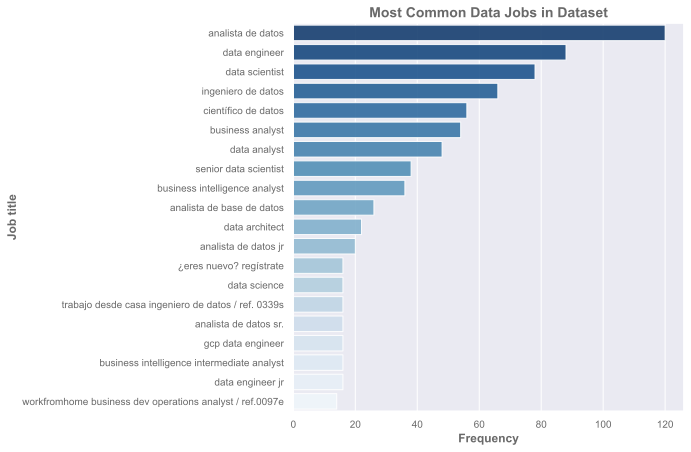

In [193]:
# Visual exploration of the Job variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Job'].str.lower().value_counts().values[0:20], 
            y = df['Job'].str.lower().value_counts().index[0:20], 
            hue = df['Job'].value_counts().index[0:20],            
            palette="Blues_r",             
            legend = False,
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Job title')
plt.title('Most Common Data Jobs in Dataset')
plt.show()

It appears that **_Analista de datos_** (Spanish for *Data Analyst*) is the most demanded position, followed by **_Data engineer_** and **_Data scientist_**. 

Notwithstanding the above, it is necessary to homologate the job titles that are in English and Spanish; as well as homologating the different variations for the same job title.

On the other hand, other job titles appear in the data set that are errors or do not correspond to data jobs.

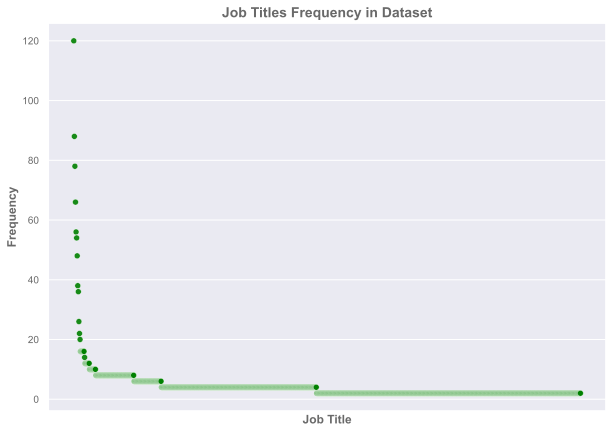

In [194]:
# Visual exploration of the Job variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Job'].str.lower().unique(), 
                y = df['Job'].str.lower().value_counts(), 
                color="Green", alpha = 0.9)
plt.xticks([])
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.title('Job Titles Frequency in Dataset')
plt.show()

The plot above shows that the largest part of the job titles retrieved from the web scraping are **unique values**. Thus, this suggests that the job titles variable is fairly inconsistent and/or it exhibits a lot of other positions which are not of interest for this study.

In [195]:
# Value counts for each job position
df[['Location']].value_counts()

Location                         
CDMX                                 1076
Miguel Hidalgo, CDMX                  406
Guadalajara, Jal.                     392
Monterrey, N.L.                       238
Cuauhtémoc, CDMX                       72
                                     ... 
Lomas Altas, Miguel Hidalgo, CDMX       2
Lerma, Edo. Méx.​                       2
La Paz, BCS.                            2
La Magdalena Contreras, CDMX            2
Mexicali, BC.                           2
Name: count, Length: 145, dtype: int64

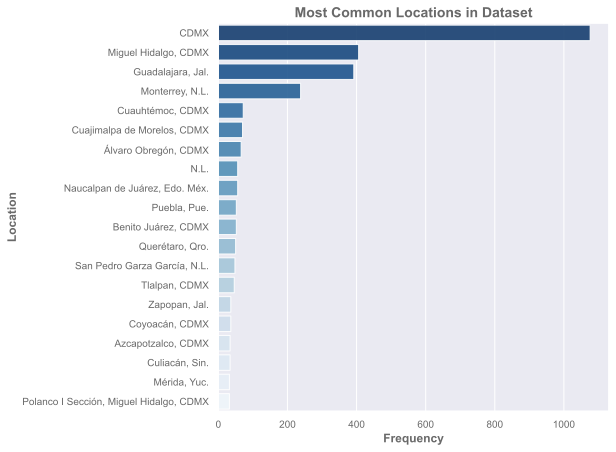

In [196]:
# Visual exploration of the Location variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Location'].value_counts().values[0:20], 
            y = df['Location'].value_counts().index[0:20], 
            hue = df['Location'].value_counts().index[0:20], 
            legend = False,
            palette="Blues_r", 
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Most Common Locations in Dataset')
plt.show()

As shown in the plot above, in some cases, only the name of the state appears while in others the name of the municipality is also included. So, a further cleaning is necessary to map all the locations to their corresponding Mexican states.

Notwithstanding with the above, it is clear that **CDMX (Mexico City)** is the location where **the most data jobs are demanded**.

In [197]:
# Value counts for each job position
df[['Company']].value_counts()

Company                  
Empresa confidencial         534
BAIRESDEV LLC / (Tax I...    524
Banamex                      204
Adecco                        60
Manpower, S.A. de C.V.        56
                            ... 
ETAM SAPI DE CV                2
Raul Barragán de la Cruz       2
Red Acero                      2
Ricoh Mexicana S.A. de...      2
DATALOGIC SA de CV             2
Name: count, Length: 419, dtype: int64

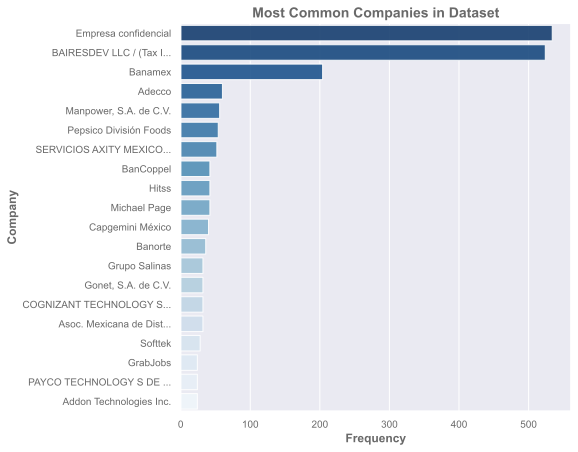

In [198]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Company'].value_counts().values[0:20], 
            y = df['Company'].value_counts().index[0:20],
            hue =  df['Company'].value_counts().index[0:20],
            legend = False,
            palette="Blues_r", 
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.title('Most Common Companies in Dataset')
plt.show()

In the dataset, most of the vacancies correspond to **confidential** companies; however, from those whose a hiring company is available, **_BAIRESDEV_** is the company with **the highest number of data jobs vacancies**. It is followed by **_Banamex_**, **_Adecco_** and **_Manpower_**.

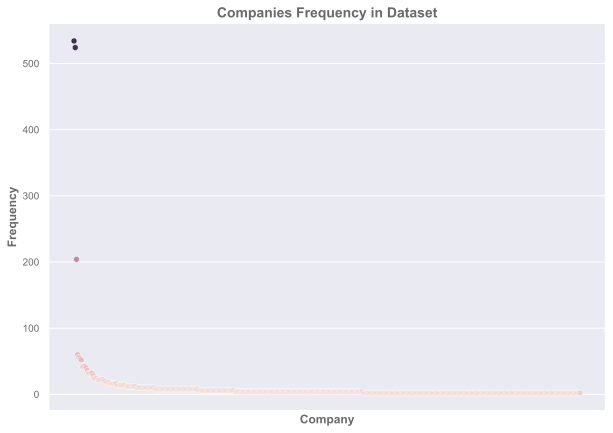

In [199]:
# Visual exploration of the Company variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = df['Company'].value_counts().index, 
                y = df['Company'].value_counts().values, 
                hue = df['Company'].value_counts().values, 
                legend = False,
                color="Salmon", 
                alpha = 0.9)
plt.xticks([])
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Companies Frequency in Dataset')
plt.show()

The plot above shows that most companies only offer **one or two** data-related positions.

In [200]:
# Value counts for each Salary
df['Salary'].value_counts()

Salary
Sueldo no mostrado por la empresa    2346
$60,000 - $70,000  Mensual             38
$25,000 - $30,000  Mensual             36
$30,000 - $35,000  Mensual             30
$20,000 - $25,000  Mensual             28
                                     ... 
$11,000 - $11,300  Mensual              2
$10,400  Mensual                        2
$6,600  Mensual                         2
$6,999 - $7,000  Mensual                2
$18,000 - $25,000  Mensual              2
Name: count, Length: 249, dtype: int64

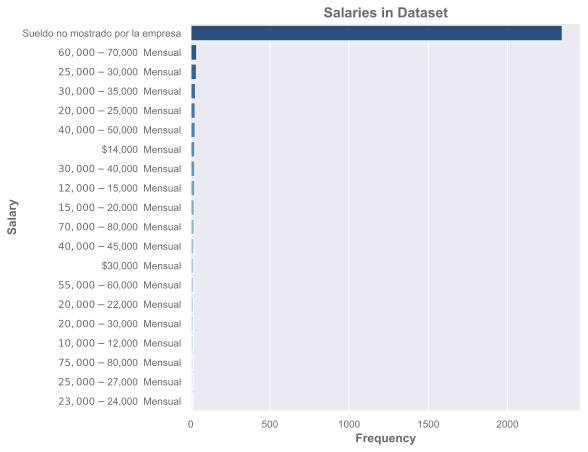

In [201]:
# Visual exploration of the Company variable (top 20)
fig, ax = plt.subplots(figsize = (7, 7))
sns.barplot(x = df['Salary'].value_counts().values[0:20], 
            y = df['Salary'].value_counts().index[0:20], 
            hue = df['Salary'].value_counts().index[0:20], 
            legend = False,
            palette ="Blues_r", 
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.title('Salaries in Dataset')
plt.show()

Obviously, is necessary to clean the data in order to get more meaningful insights regarding the salary. However, it is noteworthy that most of the published vacancies have an **undisclosed salary** (_"Sueldo no mostrado por la empresa"_).

For the vacancies that have a disclosed salary, a salary range is most commonly published rather than a single value. And, in this sense, it appears that a salary from **60,000 MXN** to **70,000 MXN** is the most common, which is probably not accurate due to the fact that the salary variable is a string instead of an actual number.

Of course, the periodicity of the payment (_"Mensual"_: monthly) must be removed from all observations.

___
## **4. Data Preparation** <a class="anchor" id="preparation"></a>
___


After the data was explored, some wrangling strategies to effectively clean the data were defined. In this sense, some of the procedures applied to the data were:
- Drop of duplicates
- Imputation of null values
- Harmonization of terms
- Trimming and cleaning of values
- Slicing of observations
- Split of columns
- Altering of data types

From the raw data obtained through web scraping, it has been noticed that much of the vacancies published lack of salary data. However, those positions without said data might be useful for assessing the geographical distribution of the data jobs in Mexico as well as identiying which companies demand more data specialists even if they have not published a proposed salary.

Thus, two datasets were prepared:
1. A dataset with all the vacancies (**_df_**).
2. A dataset with only the vacancies with disclosed salary data (**_salary_df_**).

### **4.1 Drop of the duplicates** <a class="anchor" id="duplicates"></a>

As some companies republish their vacancies in the website in order for their vacancies to appear in the first places of the search results, it deemed necessary to drop the duplicate positions. 

In [202]:
# Drop of duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, 0 to 3541
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1182 non-null   object
 1   Salary    1182 non-null   object
 2   Company   1182 non-null   object
 3   Location  1117 non-null   object
dtypes: object(4)
memory usage: 46.2+ KB


In [203]:
# Resetting index
df = df.reset_index().drop(columns='index')
df.head(20)

Job                             Salary  \
0                      Analista de datos         $20,000 - $25,000  Mensual   
1                      Analista de Datos  Sueldo no mostrado por la empresa   
2                  Analista de datos MDM         $17,000 - $20,000  Mensual   
3            ANALISTA DE DATOS ECOMMERCE                   $16,000  Mensual   
4             Analista de datos maestros                   $10,000  Mensual   
5          Coordinador analista de datos  Sueldo no mostrado por la empresa   
6   ANALISTA DE DATOS / EXPERTO EN EXCEL         $11,000 - $13,000  Mensual   
7   Analista de Datos en Azure (6 meses)         $55,000 - $60,000  Mensual   
8   Analista de Datos (Power Bi-Tableau)                   $29,000  Mensual   
9              Analista de base de datos         $25,000 - $27,000  Mensual   
10         Analista de Bases de Datos BI         $28,000 - $29,000  Mensual   
11      Analista de Gestión de Datos Jr.         $11,000 - $11,500  Mensual   
12                          Data Analyst  Sueldo no mostrado por la empresa   
13                          Data Analyst         $60,000 - $65,000  Mensual   
14                          Data analyst         $30,000 - $35,000  Mensual   
15                          Data analyst  Sueldo no mostrado por la empresa   
16                Portfolio Data Analyst  Sueldo no mostrado por la empresa   
17         Data Warehouse Sr. Consultant  Sueldo no mostrado por la empresa   
18                 ANALISTA Y SOPORTE TI         $15,000 - $20,000  Mensual   
19          GESTOR DE DATOS DE PRUEBA JR  Sueldo no mostrado por la empresa   

                      Company                                   Location  
0   SKANDIA OPERADORA DE F...   Polanco II Sección, Miguel Hidalgo, CDMX  
1          GENERAL DE SEGUROS                                       CDMX  
2    Grupo Alnus S.A. de C.V.                            Monterrey, N.L.  
3                 Grupo Daisa                           Cuauhtémoc, CDMX  
4        Empresa confidencial                            Monterrey, N.L.  
5        Empresa confidencial                       Miguel Hidalgo, CDMX  
6        Empresa confidencial                              Zapopan, Jal.  
7                       SYGNO                            Monterrey, N.L.  
8        Empresa confidencial                                       CDMX  
9   SERVICIOS DE ENERGIA E...                            Monterrey, N.L.  
10       Empresa confidencial                                       CDMX  
11     Pepsico División Foods                           Hermosillo, Son.  
12               Michael Page                                        NaN  
13                       Alia  San José Insurgentes, Benito Juárez, CDMX  
14       Empresa confidencial                       Miguel Hidalgo, CDMX  
15  Carl Zeiss de México, ...                                       CDMX  
16                    Banamex                                       CDMX  
17                    Banamex                                       CDMX  
18       Empresa confidencial                Cuajimalpa de Morelos, CDMX  
19                    Getecsa                       Miguel Hidalgo, CDMX

### **4.2 Cleaning of the Attribute _Job_** <a class="anchor" id="clean_job"></a>

This section shows the process carried out to harmonize the job titles of the data-related positions and the drop of non data-related jobs.

To do so, a data jobs dictionary using keys in both English and Spanish was defined. If a certain vacancy comprised all the terms in the keys, then, the job title was renamed to a standard job title.

As a backup, a copy of the original job titles were kept in another column for comparison purposes.

In [204]:
# Creating a new column for keeping the original job titles
df['Original Job Title'] = df['Job']
df = df[['Original Job Title', 'Job', 'Salary', 'Company', 'Location']]
df.head()

Original Job Title                          Job  \
0            Analista de datos            Analista de datos   
1            Analista de Datos            Analista de Datos   
2        Analista de datos MDM        Analista de datos MDM   
3  ANALISTA DE DATOS ECOMMERCE  ANALISTA DE DATOS ECOMMERCE   
4   Analista de datos maestros   Analista de datos maestros   

                              Salary                    Company  \
0         $20,000 - $25,000  Mensual  SKANDIA OPERADORA DE F...   
1  Sueldo no mostrado por la empresa         GENERAL DE SEGUROS   
2         $17,000 - $20,000  Mensual   Grupo Alnus S.A. de C.V.   
3                   $16,000  Mensual                Grupo Daisa   
4                   $10,000  Mensual       Empresa confidencial   

                                   Location  
0  Polanco II Sección, Miguel Hidalgo, CDMX  
1                                      CDMX  
2                           Monterrey, N.L.  
3                          Cuauhtémoc, CDMX  
4                           Monterrey, N.L.

In [205]:
# Creating job dictionary
job_dict = {
    ('data', 'analyst'): 'Data Analyst',
    ('analista', 'datos'): 'Data Analyst',

    ('data', 'scientist'): 'Data Scientist',
    ('data', 'science'): 'Data Scientist',
    ('científico', 'datos'): 'Data Scientist',
    ('cientifico', 'datos'): 'Data Scientist',

    ('data', 'engineer'): 'Data Engineer',
    ('ingeniero', 'datos'): 'Data Engineer',
    
    ('data', 'architect'): 'Data Architect',
    ('arquitecto', 'datos'): 'Data Architect',

    ('business', 'intelligence'): 'BI Analyst',
    ('bi', 'analyst'): 'BI Analyst',
    ('analista', 'bi'): 'BI Analyst',
    ('inteligencia', 'negocios'): 'BI Analyst',

    ('business', 'analyst'): 'Business Analyst',
    ('analista', 'negocio'): 'Business Analyst',

    ('machine', 'learning'): 'ML Engineer',
    ('aprendizaje' , 'automatico'): 'ML Engineer'
    
}

In [206]:
# Proof of concept
list(job_dict.keys())[0][0] in 'data analyst' and list(job_dict.keys())[0][1] in 'data analyst'

True

In [207]:
# Conversion of job observations to lower case
df['Job'] = df['Job'].str.casefold()

In [208]:
# Cleaning of the variable Job
for i in range(len(job_dict)):
    df['Job'] = df['Job'].map(lambda x: list(job_dict.values())[i] if (list(job_dict.keys())[i][0] in x and list(job_dict.keys())[i][1] in x) else x)

df.head(10)

Original Job Title           Job  \
0                     Analista de datos  Data Analyst   
1                     Analista de Datos  Data Analyst   
2                 Analista de datos MDM  Data Analyst   
3           ANALISTA DE DATOS ECOMMERCE  Data Analyst   
4            Analista de datos maestros  Data Analyst   
5         Coordinador analista de datos  Data Analyst   
6  ANALISTA DE DATOS / EXPERTO EN EXCEL  Data Analyst   
7  Analista de Datos en Azure (6 meses)  Data Analyst   
8  Analista de Datos (Power Bi-Tableau)  Data Analyst   
9             Analista de base de datos  Data Analyst   

                              Salary                    Company  \
0         $20,000 - $25,000  Mensual  SKANDIA OPERADORA DE F...   
1  Sueldo no mostrado por la empresa         GENERAL DE SEGUROS   
2         $17,000 - $20,000  Mensual   Grupo Alnus S.A. de C.V.   
3                   $16,000  Mensual                Grupo Daisa   
4                   $10,000  Mensual       Empresa confidencial   
5  Sueldo no mostrado por la empresa       Empresa confidencial   
6         $11,000 - $13,000  Mensual       Empresa confidencial   
7         $55,000 - $60,000  Mensual                      SYGNO   
8                   $29,000  Mensual       Empresa confidencial   
9         $25,000 - $27,000  Mensual  SERVICIOS DE ENERGIA E...   

                                   Location  
0  Polanco II Sección, Miguel Hidalgo, CDMX  
1                                      CDMX  
2                           Monterrey, N.L.  
3                          Cuauhtémoc, CDMX  
4                           Monterrey, N.L.  
5                      Miguel Hidalgo, CDMX  
6                             Zapopan, Jal.  
7                           Monterrey, N.L.  
8                                      CDMX  
9                           Monterrey, N.L.

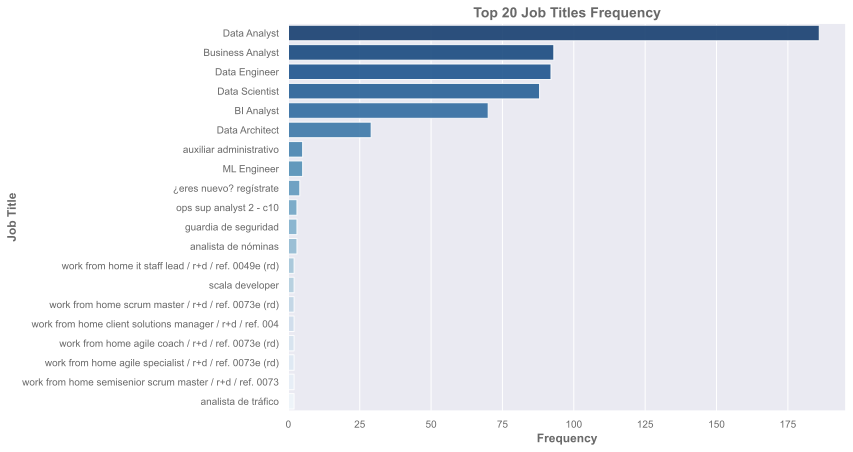

In [209]:
# Visual exploration of the Job variable (Top 20 positions)
number_positions = 20
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(x=df['Job'].value_counts()[:number_positions], 
            y=df['Job'].value_counts().keys()[:number_positions], 
            hue=df['Job'].value_counts().keys()[:number_positions],
            legend=False,
            palette="Blues_r", 
            alpha= 0.9)
plt.title('Top 20 Job Titles Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

In the plot above it is possible to observe:
1. The job titles for the data-related positions have been successfully harmonized and they conform the majority of the observations in the dataset
2. Along with the data positions, there is significant number of other non data-related positions. So, the latter will be removed from the dataset.

In [210]:
# Drop of observations not corresponding to Data Jobs
df = df.loc[(df['Job'] == 'Data Analyst') 
            | (df['Job'] == 'Business Analyst') 
            | (df['Job'] == 'Data Engineer') 
            | (df['Job'] == 'Data Scientist') 
            | (df['Job'] == 'Data Architect')
            | (df['Job'] == 'BI Analyst')
            | (df['Job'] == 'ML Engineer')]
df['Job'].value_counts()

Job
Data Analyst        186
Business Analyst     93
Data Engineer        92
Data Scientist       88
BI Analyst           70
Data Architect       29
ML Engineer           5
Name: count, dtype: int64

In [211]:
# Resulting number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 1181
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Original Job Title  563 non-null    object
 1   Job                 563 non-null    object
 2   Salary              563 non-null    object
 3   Company             563 non-null    object
 4   Location            518 non-null    object
dtypes: object(5)
memory usage: 26.4+ KB


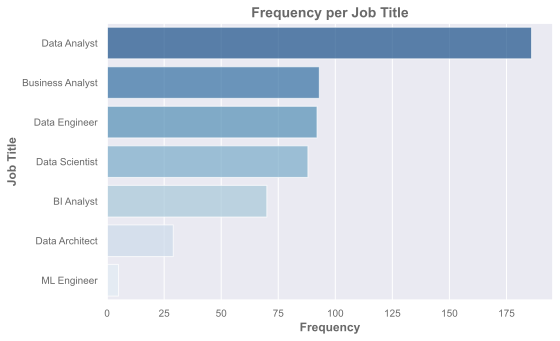

In [212]:
# Visual exploration of the cleaned Job variable 
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x=df['Job'].value_counts()[:7], 
            y=df['Job'].value_counts().keys()[:7], 
            hue=df['Job'].value_counts().keys()[:7], 
            legend=False,
            palette="Blues_r", 
            alpha=0.7)
plt.title('Frequency per Job Title')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

From the plot above, it is possible to see that the variable **Job**  has been successfully cleaned as data-related jobs are the only observations in the data set and their job titles are consistent. It is also noteworthy that **_Data Analyst_ is the most demanded position**.

#### **4.3 Cleaning of the Attribute _Company_** <a class="anchor" id="clean_company"></a>

This section shows the process carried out to impute the null values for a string legend of "Confidential" and to provide consistency to the letter case in the company names of the retrieved data.

Moreover, whenever the company is published in the vacancy as "*Empresa Confidencial*"(Spanish for confidential company), it was changed to "Confidential" too.

In [213]:
# Cleaning of the Company variable
df['Company'] = df['Company'].apply(lambda x: "Confidential" if pd.isnull(x) else x)
df['Company'] = df['Company'].apply(lambda x: str.title(str(x)))
df['Company'] = df['Company'].apply(lambda x: "Confidential" if x == "Empresa Confidencial" else x)
df.head(10)

Original Job Title           Job  \
0                     Analista de datos  Data Analyst   
1                     Analista de Datos  Data Analyst   
2                 Analista de datos MDM  Data Analyst   
3           ANALISTA DE DATOS ECOMMERCE  Data Analyst   
4            Analista de datos maestros  Data Analyst   
5         Coordinador analista de datos  Data Analyst   
6  ANALISTA DE DATOS / EXPERTO EN EXCEL  Data Analyst   
7  Analista de Datos en Azure (6 meses)  Data Analyst   
8  Analista de Datos (Power Bi-Tableau)  Data Analyst   
9             Analista de base de datos  Data Analyst   

                              Salary                    Company  \
0         $20,000 - $25,000  Mensual  Skandia Operadora De F...   
1  Sueldo no mostrado por la empresa         General De Seguros   
2         $17,000 - $20,000  Mensual   Grupo Alnus S.A. De C.V.   
3                   $16,000  Mensual                Grupo Daisa   
4                   $10,000  Mensual               Confidential   
5  Sueldo no mostrado por la empresa               Confidential   
6         $11,000 - $13,000  Mensual               Confidential   
7         $55,000 - $60,000  Mensual                      Sygno   
8                   $29,000  Mensual               Confidential   
9         $25,000 - $27,000  Mensual  Servicios De Energia E...   

                                   Location  
0  Polanco II Sección, Miguel Hidalgo, CDMX  
1                                      CDMX  
2                           Monterrey, N.L.  
3                          Cuauhtémoc, CDMX  
4                           Monterrey, N.L.  
5                      Miguel Hidalgo, CDMX  
6                             Zapopan, Jal.  
7                           Monterrey, N.L.  
8                                      CDMX  
9                           Monterrey, N.L.

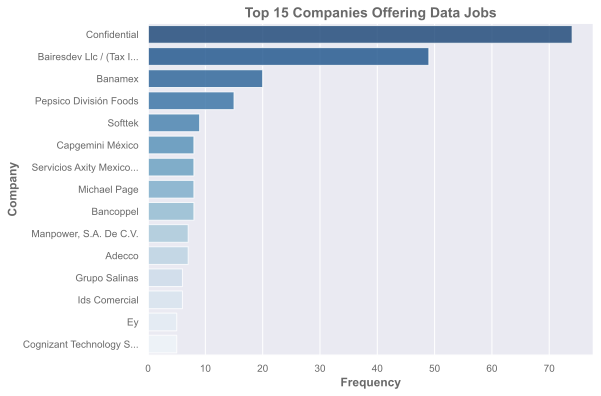

In [214]:
# Visual exploration of the cleaned Company variable
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=df['Company'].value_counts()[:15], 
            y=df['Company'].value_counts().keys()[:15],
            hue=df['Company'].value_counts().keys()[:15],
            legend=False, 
            palette="Blues_r", 
            alpha = 0.8)
plt.title('Top 15 Companies Offering Data Jobs')
plt.xlabel('Frequency')
plt.ylabel('Company')
plt.show()

The plot above suggests that the letter case of the different company names is now consistent, and all the vacancies with confidential companies have been harmonized as *Confidential*. So, it is deemed that the variable **Company** has been successfully cleaned.

In this sense, it is noteworthy that **most of the vacancies for data jobs correspond to confidential companies**. However, from those publications whose the hiring company is not confidential, the top company demanding data jobs in Mexico is **Bairesdev**.

### **4.4 Cleaning of the attribute _Location_** <a class="anchor" id="clean_location"></a>

This section shows the process carried out to harmonize the name of the Mexican States in which the data-related positions are demanded.

To do so, firstly, the state component was extracted from each location observation.

In [215]:
# Extraction of the state from the location data
df['Location'] = df['Location'].apply(lambda x: "Remote/NA" if pd.isnull(x) else x)
df['Location'] = df['Location'].apply(lambda x: str(x).split(",")[-1] if len(str(x).split(",")) > 1 else x)
df['Location'] = df['Location'].apply(lambda x: str(x.replace('\u200b', ' ')).strip())
df.head(10)

Original Job Title           Job  \
0                     Analista de datos  Data Analyst   
1                     Analista de Datos  Data Analyst   
2                 Analista de datos MDM  Data Analyst   
3           ANALISTA DE DATOS ECOMMERCE  Data Analyst   
4            Analista de datos maestros  Data Analyst   
5         Coordinador analista de datos  Data Analyst   
6  ANALISTA DE DATOS / EXPERTO EN EXCEL  Data Analyst   
7  Analista de Datos en Azure (6 meses)  Data Analyst   
8  Analista de Datos (Power Bi-Tableau)  Data Analyst   
9             Analista de base de datos  Data Analyst   

                              Salary                    Company Location  
0         $20,000 - $25,000  Mensual  Skandia Operadora De F...     CDMX  
1  Sueldo no mostrado por la empresa         General De Seguros     CDMX  
2         $17,000 - $20,000  Mensual   Grupo Alnus S.A. De C.V.     N.L.  
3                   $16,000  Mensual                Grupo Daisa     CDMX  
4                   $10,000  Mensual               Confidential     N.L.  
5  Sueldo no mostrado por la empresa               Confidential     CDMX  
6         $11,000 - $13,000  Mensual               Confidential     Jal.  
7         $55,000 - $60,000  Mensual                      Sygno     N.L.  
8                   $29,000  Mensual               Confidential     CDMX  
9         $25,000 - $27,000  Mensual  Servicios De Energia E...     N.L.

Then, a dictionary was defined using the abbreviations in the keys and the full state names in the values. After that, the dictionary was passed to the data in order to replace the abbreviations by the full state names.

In [216]:
# Dictionary with the retrieved Location values
location_dict = {
    'CDMX': 'Ciudad de México',
    'Chih.': 'Chihuahua',
    'Edo. Méx.': 'Estado de México',
    'Gto.': 'Guanajuato',
    'Jal.': 'Jalisco',
    'Q. Roo': 'Quintana Roo',
    'N. L.': 'Nuevo León',
    'N.L.': 'Nuevo León',
    'Pue.': 'Puebla',
    'México': 'Estado de México',
    'Zac.': 'Zacatecas',
    'Tamps.': 'Tamaulipas',
    'Mor.': 'Morelos',
    'Sin.': 'Sinaloa',
    'Oax.': 'Oaxaca',
    'Qro.': 'Querétaro',
    'Mich.': 'Michoacán',
    'Son.': 'Sonora',
    'BC.': 'Baja California',
    'SLP.': 'San Luis Potosí',
    'Yuc.': 'Yucatán',
    'Coah.': 'Coahuila',
    'BCS.': 'Baja California Sur',
    'Nay.': 'Nayarit',
    'Ags.': 'Aguascalientes',
    'Hgo.': 'Hidalgo',
    'Chis.': 'Chiapas',
    'Ver.': 'Veracruz',
    'Tab.': 'Tabasco'
    }

In [217]:
# Cleaning of the Location variable in the dataset
for i in range(len(location_dict)):
  df['Location'] = df['Location'].apply(lambda x: list(location_dict.values())[i] if x == list(location_dict.keys())[i] else x)

df.head(10)

Original Job Title           Job  \
0                     Analista de datos  Data Analyst   
1                     Analista de Datos  Data Analyst   
2                 Analista de datos MDM  Data Analyst   
3           ANALISTA DE DATOS ECOMMERCE  Data Analyst   
4            Analista de datos maestros  Data Analyst   
5         Coordinador analista de datos  Data Analyst   
6  ANALISTA DE DATOS / EXPERTO EN EXCEL  Data Analyst   
7  Analista de Datos en Azure (6 meses)  Data Analyst   
8  Analista de Datos (Power Bi-Tableau)  Data Analyst   
9             Analista de base de datos  Data Analyst   

                              Salary                    Company  \
0         $20,000 - $25,000  Mensual  Skandia Operadora De F...   
1  Sueldo no mostrado por la empresa         General De Seguros   
2         $17,000 - $20,000  Mensual   Grupo Alnus S.A. De C.V.   
3                   $16,000  Mensual                Grupo Daisa   
4                   $10,000  Mensual               Confidential   
5  Sueldo no mostrado por la empresa               Confidential   
6         $11,000 - $13,000  Mensual               Confidential   
7         $55,000 - $60,000  Mensual                      Sygno   
8                   $29,000  Mensual               Confidential   
9         $25,000 - $27,000  Mensual  Servicios De Energia E...   

           Location  
0  Ciudad de México  
1  Ciudad de México  
2        Nuevo León  
3  Ciudad de México  
4        Nuevo León  
5  Ciudad de México  
6           Jalisco  
7        Nuevo León  
8  Ciudad de México  
9        Nuevo León

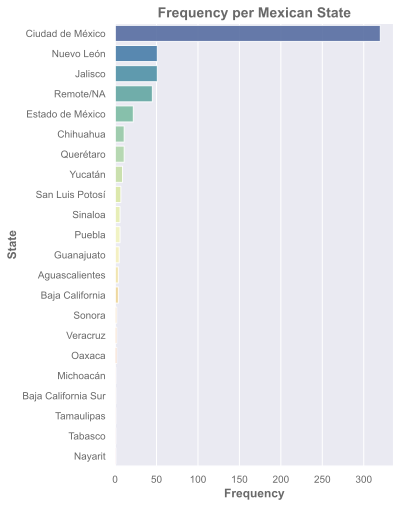

In [218]:
# Visual exploration of the cleaned Location variable
fig, ax = plt.subplots(figsize = (5, 8))
sns.barplot(x=df['Location'].value_counts().values, 
            y=df['Location'].value_counts().index, 
            hue=df['Location'].value_counts().index, 
            legend=False,
            palette="Spectral_r", 
            alpha = 0.9)
plt.title('Frequency per Mexican State')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

The plot above shows that the names of the Mexican states where the data job vacancies are demanded is now consistent. So, the variable **Location** has been successfully cleaned. 

Moreover, it is noteworthy that **Ciudad de México** (Mexico City) is the location where the most of the data jobs are demanded.

### **4.5 Cleaning of the Attribute _Salary_** <a class="anchor" id="clean_salary"></a>

This section shows the process carried out to wrangle and clean the salary data. To do so, the salary observations were cleaned from useless characters, then, the salary ranges were splitted into two columns and a average salary was calculated when applicable. Finally, non useful Salary columns were dropped.

In [219]:
# Checking if all the Salary observations are disclosed in a monthly basis
df[df['Salary'].apply(lambda x: True if ('Mensual' not in str(x)) and (x is not np.nan) else False) & (df['Salary'] != 'Sueldo no mostrado por la empresa')]

Empty DataFrame
Columns: [Original Job Title, Job, Salary, Company, Location]
Index: []

Thus, all of the observations correspond to monthly salaries.

In [220]:
# Replacing the wording of the positions without disclosed salaries with NaN values
df['Salary'] = df['Salary'].apply(lambda x: np.nan if x == 'Sueldo no mostrado por la empresa' else x)
df.head()

Original Job Title           Job                      Salary  \
0            Analista de datos  Data Analyst  $20,000 - $25,000  Mensual   
1            Analista de Datos  Data Analyst                         NaN   
2        Analista de datos MDM  Data Analyst  $17,000 - $20,000  Mensual   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst            $16,000  Mensual   
4   Analista de datos maestros  Data Analyst            $10,000  Mensual   

                     Company          Location  
0  Skandia Operadora De F...  Ciudad de México  
1         General De Seguros  Ciudad de México  
2   Grupo Alnus S.A. De C.V.        Nuevo León  
3                Grupo Daisa  Ciudad de México  
4               Confidential        Nuevo León

In [221]:
# Removing useless characters from column values
char_remove = {
                'Anual': '',
                'Mensual': '',
                '$': '',
                ',': ''}

for key, value in char_remove.items():
    df['Salary'] = df['Salary'].str.replace(key, value).str.strip()

df.head()

Original Job Title           Job         Salary  \
0            Analista de datos  Data Analyst  20000 - 25000   
1            Analista de Datos  Data Analyst            NaN   
2        Analista de datos MDM  Data Analyst  17000 - 20000   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst          16000   
4   Analista de datos maestros  Data Analyst          10000   

                     Company          Location  
0  Skandia Operadora De F...  Ciudad de México  
1         General De Seguros  Ciudad de México  
2   Grupo Alnus S.A. De C.V.        Nuevo León  
3                Grupo Daisa  Ciudad de México  
4               Confidential        Nuevo León

In [222]:
# Splitting Salary column values into two columns
df[['Min Salary', 'Max Salary']] = df['Salary'].str.split('-', expand=True)
df['Min Salary'] = df['Min Salary'].str.strip().astype(np.float64)
df['Max Salary'] = df['Max Salary'].str.strip().astype(np.float64)
df.head()

Original Job Title           Job         Salary  \
0            Analista de datos  Data Analyst  20000 - 25000   
1            Analista de Datos  Data Analyst            NaN   
2        Analista de datos MDM  Data Analyst  17000 - 20000   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst          16000   
4   Analista de datos maestros  Data Analyst          10000   

                     Company          Location  Min Salary  Max Salary  
0  Skandia Operadora De F...  Ciudad de México     20000.0     25000.0  
1         General De Seguros  Ciudad de México         NaN         NaN  
2   Grupo Alnus S.A. De C.V.        Nuevo León     17000.0     20000.0  
3                Grupo Daisa  Ciudad de México     16000.0         NaN  
4               Confidential        Nuevo León     10000.0         NaN

In [223]:
# Calculating average salary for each vacancy
df['Avg Salary'] = (df['Min Salary'] + df['Max Salary']) / 2
df.head()

Original Job Title           Job         Salary  \
0            Analista de datos  Data Analyst  20000 - 25000   
1            Analista de Datos  Data Analyst            NaN   
2        Analista de datos MDM  Data Analyst  17000 - 20000   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst          16000   
4   Analista de datos maestros  Data Analyst          10000   

                     Company          Location  Min Salary  Max Salary  \
0  Skandia Operadora De F...  Ciudad de México     20000.0     25000.0   
1         General De Seguros  Ciudad de México         NaN         NaN   
2   Grupo Alnus S.A. De C.V.        Nuevo León     17000.0     20000.0   
3                Grupo Daisa  Ciudad de México     16000.0         NaN   
4               Confidential        Nuevo León     10000.0         NaN   

   Avg Salary  
0     22500.0  
1         NaN  
2     18500.0  
3         NaN  
4         NaN

It seems that some salary data is only in the *Min Salary* column. Those observations correspond to the vacancies in which the published salary was not a range but a single value. Thus, said value was copied into the *Max Salary* and *Avg Salary* columns.

In [224]:
# Imputing NaN values in the Avg Salary column with the values in the Min Salary column
mask = pd.isna(df['Avg Salary']) & ~pd.isna(df['Min Salary'])
df.loc[mask, 'Avg Salary'] = df['Min Salary'] # Using loc to avoid the SettingWithCopyWarning
df.loc[mask, 'Max Salary'] = df['Min Salary'] # Using loc to avoid the SettingWithCopyWarning
df.head()

Original Job Title           Job         Salary  \
0            Analista de datos  Data Analyst  20000 - 25000   
1            Analista de Datos  Data Analyst            NaN   
2        Analista de datos MDM  Data Analyst  17000 - 20000   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst          16000   
4   Analista de datos maestros  Data Analyst          10000   

                     Company          Location  Min Salary  Max Salary  \
0  Skandia Operadora De F...  Ciudad de México     20000.0     25000.0   
1         General De Seguros  Ciudad de México         NaN         NaN   
2   Grupo Alnus S.A. De C.V.        Nuevo León     17000.0     20000.0   
3                Grupo Daisa  Ciudad de México     16000.0     16000.0   
4               Confidential        Nuevo León     10000.0     10000.0   

   Avg Salary  
0     22500.0  
1         NaN  
2     18500.0  
3     16000.0  
4     10000.0

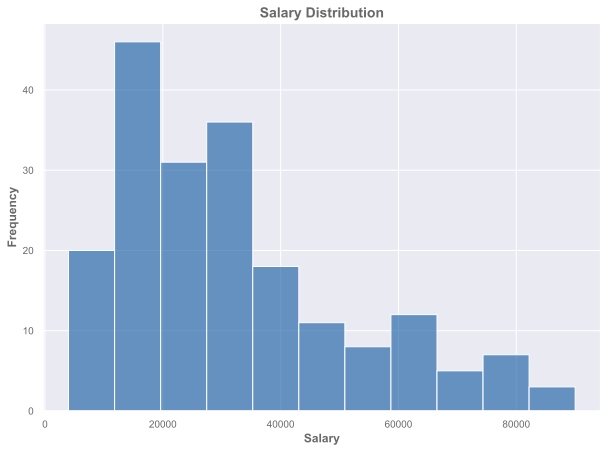

In [225]:
# Visual exploration of the cleaned Salary variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data=df['Avg Salary'], 
             color=sns.color_palette('Blues_r')[0], 
             alpha=0.6)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

 The histogram above suggests that all Salary observations have been transformed from a range in a string format into actual numbers. So, it is considered that the variable **Salary** has been successfully cleaned. On the other hand, it is noteworthy that some observations fall well beyond the main salary distribution. Let's take a look into those observations.

In [226]:
# Exploring positions whose salary is more than $70,000 MXN per month
df[df['Avg Salary'] > 70000]

Original Job Title             Job         Salary  \
48                   Analista de datos sr.    Data Analyst  70000 - 80000   
52                   Analista de datos Sr.    Data Analyst          80000   
135                SQL Server Data Analyst    Data Analyst  70000 - 85000   
199                    Científico de Datos  Data Scientist          90000   
225                      Sr Data Scientist  Data Scientist  70000 - 80000   
281                       Sr Data Engineer   Data Engineer  75000 - 80000   
427             Data engineer (Databricks)   Data Engineer  80000 - 90000   
428             Data Engineer (Databricks)   Data Engineer  80000 - 90000   
448  Data Engineer with Fivetran developer   Data Engineer  70000 - 80000   
479                         Data Architect  Data Architect  70000 - 80000   

                       Company          Location  Min Salary  Max Salary  \
48                Confidential  Ciudad de México     70000.0     80000.0   
52                Confidential  Ciudad de México     80000.0     80000.0   
135                Caspex Corp         Remote/NA     70000.0     85000.0   
199  Ecosistemex S. De R.L....  Ciudad de México     90000.0     90000.0   
225  Enterprise Solutions, ...  Ciudad de México     70000.0     80000.0   
281    Addon Technologies Inc.           Jalisco     75000.0     80000.0   
427     Manpower, S.A. De C.V.  Estado de México     80000.0     90000.0   
428     Manpower, S.A. De C.V.  Estado de México     80000.0     90000.0   
448  Enterprise Solutions, ...         Remote/NA     70000.0     80000.0   
479                    Softtek         Remote/NA     70000.0     80000.0   

     Avg Salary  
48      75000.0  
52      80000.0  
135     77500.0  
199     90000.0  
225     75000.0  
281     77500.0  
427     85000.0  
428     85000.0  
448     75000.0  
479     75000.0

From the above results, it is plausible that Data Engineer and Data Architect positions earns an extremely high salaries as the ones showed as such positions require advanced programming skills and expertise. However, it is interesting that some Sr. Data Analyst and Sr. Data Scientists positions made it to the top.

Finally, the original Salary column was dropped.

In [227]:
# Dropping of the original Salary column
df = df.drop(columns = ['Salary'])
df.head()

Original Job Title           Job                    Company  \
0            Analista de datos  Data Analyst  Skandia Operadora De F...   
1            Analista de Datos  Data Analyst         General De Seguros   
2        Analista de datos MDM  Data Analyst   Grupo Alnus S.A. De C.V.   
3  ANALISTA DE DATOS ECOMMERCE  Data Analyst                Grupo Daisa   
4   Analista de datos maestros  Data Analyst               Confidential   

           Location  Min Salary  Max Salary  Avg Salary  
0  Ciudad de México     20000.0     25000.0     22500.0  
1  Ciudad de México         NaN         NaN         NaN  
2        Nuevo León     17000.0     20000.0     18500.0  
3  Ciudad de México     16000.0     16000.0     16000.0  
4        Nuevo León     10000.0     10000.0     10000.0

In [228]:
df.describe()

Min Salary    Max Salary    Avg Salary
count    197.000000    197.000000    197.000000
mean   30114.121827  34211.827411  32162.974619
std    18295.173638  20662.664676  19417.175845
min     4000.000000   4000.000000   4000.000000
25%    16000.000000  19000.000000  17500.000000
50%    25000.000000  30000.000000  27500.000000
75%    40000.000000  45000.000000  42000.000000
max    90000.000000  90000.000000  90000.000000

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Original Job Title  563 non-null    object 
 1   Job                 563 non-null    object 
 2   Company             563 non-null    object 
 3   Location            563 non-null    object 
 4   Min Salary          197 non-null    float64
 5   Max Salary          197 non-null    float64
 6   Avg Salary          197 non-null    float64
dtypes: float64(3), object(4)
memory usage: 51.4+ KB


So, the dataset has been successfully cleaned and prepared for the **Data Analysis & Visualization**.

### **4.6 Processed Dataset Exporting** <a class="anchor" id="exporting"></a>

The processed dataset was exported to CSV.

In [230]:
# Exporting the processed dataset
df.to_csv('Dataset_processed.csv', index=False, encoding='utf-8')

### **4.7 Salary Dataset** <a class="anchor" id="salary_data"></a>

The second dataframe with only those vacancies whose salary have been disclosed was built in the present section.

In [231]:
# Second dataframe with only disclosed salary data
salary_df = df.dropna(axis = 0, how='any', subset = ['Avg Salary'])
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Original Job Title  197 non-null    object 
 1   Job                 197 non-null    object 
 2   Company             197 non-null    object 
 3   Location            197 non-null    object 
 4   Min Salary          197 non-null    float64
 5   Max Salary          197 non-null    float64
 6   Avg Salary          197 non-null    float64
dtypes: float64(3), object(4)
memory usage: 12.3+ KB


In [232]:
salary_df.describe()

Min Salary    Max Salary    Avg Salary
count    197.000000    197.000000    197.000000
mean   30114.121827  34211.827411  32162.974619
std    18295.173638  20662.664676  19417.175845
min     4000.000000   4000.000000   4000.000000
25%    16000.000000  19000.000000  17500.000000
50%    25000.000000  30000.000000  27500.000000
75%    40000.000000  45000.000000  42000.000000
max    90000.000000  90000.000000  90000.000000

In [233]:
salary_df.head(10)

Original Job Title           Job  \
0                      Analista de datos  Data Analyst   
2                  Analista de datos MDM  Data Analyst   
3            ANALISTA DE DATOS ECOMMERCE  Data Analyst   
4             Analista de datos maestros  Data Analyst   
6   ANALISTA DE DATOS / EXPERTO EN EXCEL  Data Analyst   
7   Analista de Datos en Azure (6 meses)  Data Analyst   
8   Analista de Datos (Power Bi-Tableau)  Data Analyst   
9              Analista de base de datos  Data Analyst   
10         Analista de Bases de Datos BI  Data Analyst   
11      Analista de Gestión de Datos Jr.  Data Analyst   

                      Company          Location  Min Salary  Max Salary  \
0   Skandia Operadora De F...  Ciudad de México     20000.0     25000.0   
2    Grupo Alnus S.A. De C.V.        Nuevo León     17000.0     20000.0   
3                 Grupo Daisa  Ciudad de México     16000.0     16000.0   
4                Confidential        Nuevo León     10000.0     10000.0   
6                Confidential           Jalisco     11000.0     13000.0   
7                       Sygno        Nuevo León     55000.0     60000.0   
8                Confidential  Ciudad de México     29000.0     29000.0   
9   Servicios De Energia E...        Nuevo León     25000.0     27000.0   
10               Confidential  Ciudad de México     28000.0     29000.0   
11     Pepsico División Foods            Sonora     11000.0     11500.0   

    Avg Salary  
0      22500.0  
2      18500.0  
3      16000.0  
4      10000.0  
6      12000.0  
7      57500.0  
8      29000.0  
9      26000.0  
10     28500.0  
11     11250.0

___
## **5. Data Analysis & Visualization** <a class="anchor" id="analysis"></a>
___

After the dataset was cleaned and prepared, the data was analyzed and visualized in order to answer the following questions:
- What is the most demanded data job?
- Where do the most data jobs locate?
- How is the data jobs demand per state?
- What are the companies demanding more data jobs?
- How is the data jobs demand per company?
- Where do the companies locate?
- How many salary observations there are for each data job category?
- Which data job category has the highest salaries?
- Where the highest salaries can be found?
- What companies offer the highest salaries?
- What companies offer the highest salaries per data job category?

To answer these questions, different plots and charts were drawn using both **Matplotlib**, **Seaborn** and **Plotly**, selecting for reporting the most aesthetic one.

On the other hand, a specific directory named "Figures" was used to store the relevant plots created during the analysis.

In [234]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

### **5.1 What is the most demanded data job?** <a class="anchor" id="most_demanded_data_job"></a>

To answer this question, a donut chart was plotted.

In [235]:
# Color palette for pie charts
pie_colors = ['#154360','#539ecd','#89bedc',"#a9cce3", "#d4e6f1",'#dbe9f6', "#ebf5fb"]

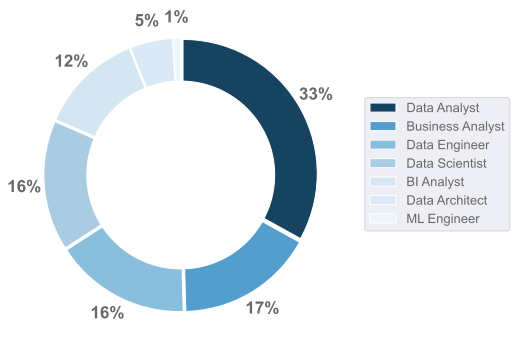

In [236]:
# Donut chart of the data jobs demand with Matplotlib
fig, ax = plt.subplots(figsize = (8, 13))
explode = [0.02] * 7
wedges, texts, autotexts = ax.pie(x = list(df['Job'].value_counts().values), 
                                  wedgeprops=dict(edgecolor='w', linewidth= 1),
                                  textprops = dict(size=17, weight="bold", color = 'dimgray'), 
                                  colors = pie_colors,                                  
                                  autopct='%.0f%%', pctdistance=1.15, startangle = 90, 
                                  counterclock = False, explode = explode)
center = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(center)
plt.legend(wedges, 
            list(df['Job'].value_counts().keys()), 
            fontsize=13, 
            #loc="center right", 
            bbox_to_anchor=(1, 0, 0.5, 0.75))
plt.tight_layout()
plt.savefig('Figures/Fig1_DemandOfDataJobsPerCategory.png',  bbox_inches = 'tight')
plt.show()

In [237]:
# Donut chart of the data jobs demand with Plotly

job_df = pd.DataFrame(df['Job'].value_counts().reset_index().rename(columns = {'count': 'Count'}))

fig = px.pie(job_df, 
             values='Count', 
             names='Job', 
             color='Job', 
             hole=0.7,  
             color_discrete_sequence=px.colors.sequential.Blues_r,
             height=500,
             width=700,
             title='<b>Demand of Data Jobs Per Category</b>')
fig.update_layout(title_x=0.5, 
                  font=font_px,
                  legend = legend_px                  
                  )
fig.update_traces(hoverinfo='label+percent+name',
                  textfont_size=18,
                  textinfo='percent',
                  texttemplate='%{percent:.0%}',
                  direction ='clockwise',
                  marker=dict(colors=pie_colors, line=dict(color='white', width=1)))
fig.write_image("Figures/Fig1_DemandOfDataJobsPerCategory2.png", scale=2)
#fig.write_image("Figures/Fig1_DemandOfDataJobsPerCategory2.svg", scale=2)
fig.show(config=config)

From the above plot, it is possible to conclude that a third of the data jobs (**33%**) correspond to positions of **Data Analyst**, rendering them as **the most demanded** ones in the Mexican labor market at the time of this study. In second place, it is possible to found the positions of **Business Analyst** with about **17%** of the total. 

Furthermore, it is noteworthy that **Data Engineer** and **Data Scientists** positions are more demanded than **Business Intelligence Analyst** positions with about **16%**, about **16%** and about **12%** of the demand in the country, respectively. 

On the contrary, **Data Architect** and **Machine Learning Engineers** positions are the less demanded, with only about **5%** and about **1%** out of the total, respectively.


### **5.2 Where do the most data jobs locate?** <a id="data_jobs_location"></a>

To answer this question, a choropleth was prepared using Folium and Plotly.

First, to define the specific location of the markers in the Folium map, a dictionary was defined with the corresponding ID, Latitude and Longitude of the capital cities for each Mexican State.

The IDs correspond to the IDs of the <a href="https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json">file with the geographical data</a>.

Then, the dictionary was converted into a Pandas dataframe.

In [238]:
# Mexican states dictionary with corresponding ID, Latitude and Longitude

states_dict = {'Aguascalientes': ('AS', 21.87945992,	-102.2904135),
                  'Baja California': ('BC', 32.663214,-115.4903741),
                  'Baja California Sur': ('BS', 24.1584937,-110.315928),
                  'Campeche': ('CC', 19.8450352,-90.5381231),
                  'Chiapas': ('CS', 16.7541485,-93.119001),
                  'Chihuahua': ('CH', 28.6349557,-106.0777049),
                  'Coahuila': ('CL', 25.4286965,-100.9994484),
                  'Colima': ('CM', 19.2408324,-103.7291389),
                  'Ciudad de México': ('DF', 19.4335493,-99.1344048),
                  'Durango': ('DG', 24.0241017,-104.6708325),
                  'Guanajuato': ('GT', 21.0176446,-101.2586863),
                  'Guerrero': ('GR', 17.5516921,-99.5025877),
                  'Hidalgo': ('HG', 20.1183855,-98.7540094),
                  'Jalisco': ('JC', 20.6773775,-103.3494204),
                  'Estado de México': ('MC', 19.289191,-99.6670425),
                  'Michoacán': ('MN', 19.7030535,-101.1937953),
                  'Morelos': ('MS', 18.9218499,-99.2353856),
                  'Nayarit': ('NT', 21.5122308,-104.8948845),
                  'Nuevo León': ('NL', 25.6717637,-100.3163831),
                  'Oaxaca': 	('OC', 17.0617935,-96.7271634),
                  'Puebla': ('PL', 19.0428817,-98.2002919),
                  'Querétaro': ('QT', 20.37998212,	-100.0000308),
                  'Quintana Roo': ('QR', 18.4978052,-88.3029951),
                  'San Luis Potosí': ('SP', 22.1521646,-100.9765552),
                  'Sinaloa': ('SL', 24.8082702,-107.3945828),
                  'Sonora': ('SR', 29.0748734,-110.9597578),
                  'Tabasco': ('TC', 17.9882632,-92.9209807),
                  'Tamaulipas': ('TS', 23.7312703,-99.1517694),
                  'Tlaxcala': ('TL', 19.3171271,-98.2386354),
                  'Veracruz': ('VZ', 19.5269375,-96.92401),
                  'Yucatán': ('YN', 20.9664386,-89.623114),
                  'Zacatecas': ('ZS', 22.7753476,-102.5740002)}
                
states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().\
                    rename(columns={"index": "State", 0: "ID", 1: "Lat", 2: "Long"}).set_index('State')
states_df.head()

ID        Lat        Long
State                                         
Aguascalientes       AS  21.879460 -102.290413
Baja California      BC  32.663214 -115.490374
Baja California Sur  BS  24.158494 -110.315928
Campeche             CC  19.845035  -90.538123
Chiapas              CS  16.754148  -93.119001

After that, with the purpose of providing a color to each Mexican state in the choropleth, the percentage of data jobs for each state was calculated using a value counts. For those states without data jobs, a join was performed and the NaN values were filled with zeros.

In [239]:
# Calculating the Demand Percentage per State
demand_by_state_df = pd.DataFrame(df['Location'].value_counts())
total = sum(demand_by_state_df['count'])
demand_by_state_df['Percentage'] = (demand_by_state_df['count']) / total *100
demand_by_state_df = demand_by_state_df.reset_index().rename(columns={"Location": "State", "count": "Count"})
demand_by_state_df = states_df.merge(demand_by_state_df, left_on='State', right_on='State', how = 'outer').fillna(0)
demand_by_state_df

State  ID        Lat        Long  Count  Percentage
0        Aguascalientes  AS  21.879460 -102.290413    4.0    0.710480
1       Baja California  BC  32.663214 -115.490374    4.0    0.710480
2   Baja California Sur  BS  24.158494 -110.315928    1.0    0.177620
3              Campeche  CC  19.845035  -90.538123    0.0    0.000000
4               Chiapas  CS  16.754148  -93.119001    0.0    0.000000
5             Chihuahua  CH  28.634956 -106.077705   11.0    1.953819
6              Coahuila  CL  25.428697 -100.999448    0.0    0.000000
7                Colima  CM  19.240832 -103.729139    0.0    0.000000
8      Ciudad de México  DF  19.433549  -99.134405  320.0   56.838366
9               Durango  DG  24.024102 -104.670833    0.0    0.000000
10           Guanajuato  GT  21.017645 -101.258686    5.0    0.888099
11             Guerrero  GR  17.551692  -99.502588    0.0    0.000000
12              Hidalgo  HG  20.118385  -98.754009    0.0    0.000000
13              Jalisco  JC  20.677377 -103.349420   51.0    9.058615
14     Estado de México  MC  19.289191  -99.667042   22.0    3.907638
15            Michoacán  MN  19.703053 -101.193795    1.0    0.177620
16              Morelos  MS  18.921850  -99.235386    0.0    0.000000
17              Nayarit  NT  21.512231 -104.894885    1.0    0.177620
18           Nuevo León  NL  25.671764 -100.316383   51.0    9.058615
19               Oaxaca  OC  17.061794  -96.727163    2.0    0.355240
20               Puebla  PL  19.042882  -98.200292    6.0    1.065719
21            Querétaro  QT  20.379982 -100.000031   11.0    1.953819
22         Quintana Roo  QR  18.497805  -88.302995    0.0    0.000000
23      San Luis Potosí  SP  22.152165 -100.976555    7.0    1.243339
24              Sinaloa  SL  24.808270 -107.394583    6.0    1.065719
25               Sonora  SR  29.074873 -110.959758    2.0    0.355240
26              Tabasco  TC  17.988263  -92.920981    1.0    0.177620
27           Tamaulipas  TS  23.731270  -99.151769    1.0    0.177620
28             Tlaxcala  TL  19.317127  -98.238635    0.0    0.000000
29             Veracruz  VZ  19.526937  -96.924010    2.0    0.355240
30              Yucatán  YN  20.966439  -89.623114    9.0    1.598579
31            Zacatecas  ZS  22.775348 -102.574000    0.0    0.000000
32            Remote/NA   0   0.000000    0.000000   45.0    7.992895

For the Folium map, a dictionary was defined to assign a specific color for each type of data job.

In [240]:
# Dictionary to map job colors
job_colors = {
    'Data Analyst': 'blue',
    'Business Analyst': 'green',
    'Data Engineer': 'violet',
    'Data Scientist': 'red',
    'Data Architect': 'yellow',
    'Business Intelligence Analyst': 'orange',
    'Machine Learning Engineer': 'black'
  }

Later, each vacancy was colored using the dictionary above to map job color.

In [241]:
# Join of the job data dataframe with the Mexican States latitude and longitud
jobs_loc = df.merge(states_df, left_on='Location', right_on='State', how = 'inner')
jobs_loc['Marker Color'] = jobs_loc['Job'].map(job_colors)
jobs_loc.head()

Original Job Title           Job  \
0                     Analista de datos  Data Analyst   
1                     Analista de Datos  Data Analyst   
2           ANALISTA DE DATOS ECOMMERCE  Data Analyst   
3         Coordinador analista de datos  Data Analyst   
4  Analista de Datos (Power Bi-Tableau)  Data Analyst   

                     Company          Location  Min Salary  Max Salary  \
0  Skandia Operadora De F...  Ciudad de México     20000.0     25000.0   
1         General De Seguros  Ciudad de México         NaN         NaN   
2                Grupo Daisa  Ciudad de México     16000.0     16000.0   
3               Confidential  Ciudad de México         NaN         NaN   
4               Confidential  Ciudad de México     29000.0     29000.0   

   Avg Salary  ID        Lat       Long Marker Color  
0     22500.0  DF  19.433549 -99.134405         blue  
1         NaN  DF  19.433549 -99.134405         blue  
2     16000.0  DF  19.433549 -99.134405         blue  
3         NaN  DF  19.433549 -99.134405         blue  
4     29000.0  DF  19.433549 -99.134405         blue

Then, the choropleth using Folium was created, and the vacancy markers were added.

The JSON file with the geographical data was taken from <a href="https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json">Arroyo-Velázquez (2022)</a>.


In [242]:
# Initialization of Folium map
m = folium.Map(location=[24,-105], zoom_start=5)

# Setting of the Choropleth
folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json',
    name = "Data Jobs Localization",
    data = demand_by_state_df,
    columns = ["ID", "Percentage"],
    key_on = "feature.id",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.1,
    legend_name = "Data Jobs Demand (%)",
).add_to(m)

marker_cluster = MarkerCluster()
m.add_child(marker_cluster)

# Adding of individual markers to clusters
for index, record in jobs_loc.iterrows():
    marker = folium.Marker(list(record[8:10]),
                           icon = folium.Icon(color='white', icon_color=str(record[-1])))
    marker_cluster.add_child(marker)

# Setting of the Layer Control
folium.LayerControl().add_to(m)

# Showing the map
m

Finally, a choropleth map with Plotly was drawn.

In [243]:
# Choropleth map with Plotly

fig = px.choropleth(demand_by_state_df, 
                    geojson = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json', 
                    locations='ID', 
                    color='Percentage',
                    color_continuous_scale="Blues",
                    scope="north america",
                    #title='Demand of Data Jobs per Mexican State',
                    labels={'Percentage': 'National<br>Demand %'},
                    height= 500,
                    width = 800                 
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_x=0.5, font=font_px)
fig.update_geos(fitbounds="locations", visible=False)
fig.write_image("Figures/Fig2_DemandOfDataJobsPerMexicanState.png", scale=2)
#fig.write_image("Figures/Fig2_DemandOfDataJobsPerMexicanState.svg", scale=2)
fig.show(config=config)

The above map strongly suggests that **most of the data jobs are concentrated in the capital, Mexico City,** with more than **50%** of the demand at the moment of this study. 

On the other hand, according to the data, **Nuevo León**, and **Jalisco** represent distant second places, with only about **10%** of the total demand.

### **5.3 How is the data jobs demand per location?** <a class="anchor" id="demand_per_location"></a>

To answer this question, a bar plot and a heatmap were drawn.

First, a dataframe was prepared using the *pivot_table* function from Pandas using the location as the index.

The vacancies without specific locations disclosed were removed.

In [244]:
# Preparing dataframe of jobs per location
jobs_per_location_df = (df.pivot_table(index = 'Location', columns = 'Job', values = 'Company', aggfunc = 'count')
                    .fillna(0).drop("Remote/NA"))
jobs_per_location_df['Total'] = jobs_per_location_df.sum(axis=1, numeric_only= True)
jobs_per_location_df.head()

Job                  BI Analyst  Business Analyst  Data Analyst  \
Location                                                          
Aguascalientes              0.0               2.0           1.0   
Baja California             1.0               1.0           1.0   
Baja California Sur         0.0               0.0           1.0   
Chihuahua                   8.0               1.0           2.0   
Ciudad de México           37.0              54.0         101.0   

Job                  Data Architect  Data Engineer  Data Scientist  \
Location                                                             
Aguascalientes                  0.0            1.0             0.0   
Baja California                 0.0            1.0             0.0   
Baja California Sur             0.0            0.0             0.0   
Chihuahua                       0.0            0.0             0.0   
Ciudad de México               18.0           50.0            58.0   

Job                  ML Engineer  Total  
Location                                 
Aguascalientes               0.0    4.0  
Baja California              0.0    4.0  
Baja California Sur          0.0    1.0  
Chihuahua                    0.0   11.0  
Ciudad de México             2.0  320.0

As most of the data jobs concentrates in few locations, the top 5 were used to create a new dataframe to be used to draw the bar plots.

In [245]:
# Top 5 locations
top_locations = 5
jobs_per_location_bar_plot_df = (jobs_per_location_df.sort_values('Total', ascending = False)[:top_locations]
                                 .sort_values('Total', ascending = True).drop(columns = 'Total')
                                )
jobs_per_location_bar_plot_df.head()

Job               BI Analyst  Business Analyst  Data Analyst  Data Architect  \
Location                                                                       
Querétaro                2.0               3.0           5.0             0.0   
Estado de México         1.0               4.0          12.0             0.0   
Nuevo León               5.0               6.0          22.0             0.0   
Jalisco                  5.0              10.0          16.0             3.0   
Ciudad de México        37.0              54.0         101.0            18.0   

Job               Data Engineer  Data Scientist  ML Engineer  
Location                                                      
Querétaro                   1.0             0.0          0.0  
Estado de México            4.0             1.0          0.0  
Nuevo León                 11.0             7.0          0.0  
Jalisco                     8.0             6.0          3.0  
Ciudad de México           50.0            58.0          2.0

In [246]:
# Order of the data jobs according to demand
data_jobs_order = list(df['Job'].value_counts().keys())
data_jobs_order

['Data Analyst',
 'Business Analyst',
 'Data Engineer',
 'Data Scientist',
 'BI Analyst',
 'Data Architect',
 'ML Engineer']

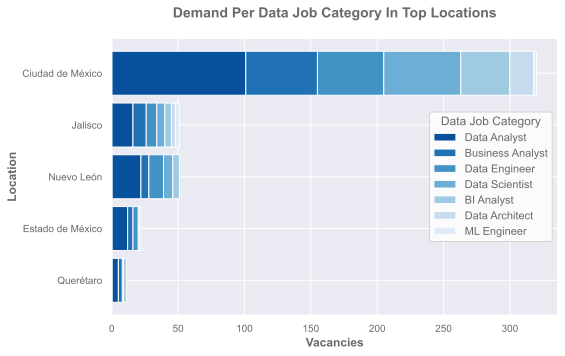

In [247]:
# Bar plot of Jobs by State with Matplotlib

# Stack bar chart of Data jobs per State
jobs_per_location_bar_plot_df.plot.barh(stacked=True, 
                                y = data_jobs_order, 
                                color=sns.color_palette('Blues_r',7),
                                figsize=(8, 5),
                                width = 0.85 )
plt.legend(facecolor = 'white', loc = 'center right', title = 'Data Job Category')
plt.xlabel('Vacancies', weight = 'bold')
plt.ylabel('Location', weight = 'bold')
plt.title('Demand Per Data Job Category In Top Locations\n')
plt.savefig('Figures/Fig3_DemandPerDataJobCategoryInTopLocations1.png',  bbox_inches = 'tight')
plt.show()

In [250]:
# Bar plot of Jobs by State with Plotly
fig = px.bar(jobs_per_location_bar_plot_df, 
            x=data_jobs_order, 
            y=jobs_per_location_bar_plot_df.index,
            color_discrete_sequence=px.colors.sequential.Blues_r,
            height = 500,
            width = 800,
            title = '<b>Demand Per Data Job Category In Top Locations</b>',
            labels = {"value": "<b>Vacancies</b>", 
                      "variable": "Data Job Category",
                      "Location":"<b>Location</b>"},
            barmode='stack'#'group'
            )
fig.update_layout(title_x=0.5, font=font_px, legend=legend_px)
fig.write_image("Figures/Fig3_DemandPerDataJobCategoryInToptLocations2.png", scale=2)
#fig.write_image("Figures/Fig3_DemandPerDataJobCategoryInTopLocations2.svg", scale=2)
fig.show(config=config)

To draw the heatmaps, a new dataframe was built using the previous dataframe joined with the dataframe with the states data. This, with the purpose to draw the heapmap with all the states from Mexico, and not only with those with current vacancies. 

In [249]:
# Building Dataframe for Heatmap
jobs_per_location_heatmap_df = (jobs_per_location_df.join(states_df, how = 'outer').fillna(0)
                                .drop(columns = ['Total','ID', 'Lat', 'Long'])
                                )
jobs_per_location_heatmap_df.head()

BI Analyst  Business Analyst  Data Analyst  \
Aguascalientes              0.0               2.0           1.0   
Baja California             1.0               1.0           1.0   
Baja California Sur         0.0               0.0           1.0   
Campeche                    0.0               0.0           0.0   
Chiapas                     0.0               0.0           0.0   

                     Data Architect  Data Engineer  Data Scientist  \
Aguascalientes                  0.0            1.0             0.0   
Baja California                 0.0            1.0             0.0   
Baja California Sur             0.0            0.0             0.0   
Campeche                        0.0            0.0             0.0   
Chiapas                         0.0            0.0             0.0   

                     ML Engineer  
Aguascalientes               0.0  
Baja California              0.0  
Baja California Sur          0.0  
Campeche                     0.0  
Chiapas                      0.0

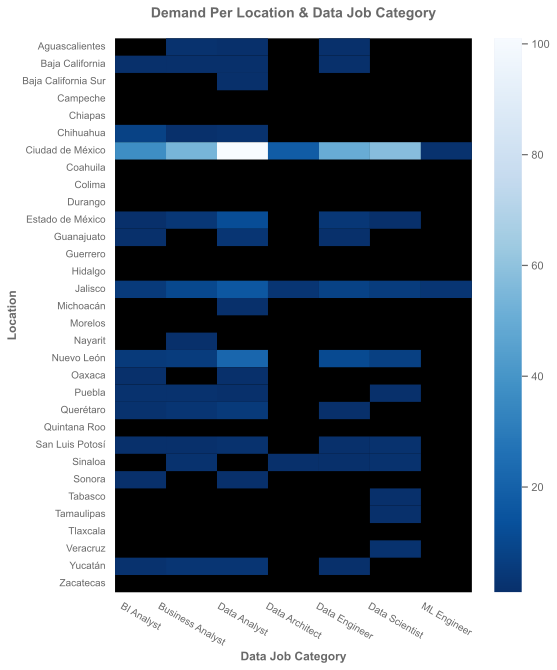

In [251]:
# Heatmap of Data Jobs per State with Matplotlib
plt.figure(figsize = (8,10))
ax = sns.heatmap(jobs_per_location_heatmap_df, 
                cmap = "Blues_r",
                mask = (jobs_per_location_heatmap_df == 0))
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.xlabel('Data Job Category')
plt.ylabel('Location')
plt.xticks(rotation = 330) 
plt.title('Demand Per Location & Data Job Category\n')
plt.grid(False)
plt.savefig('Figures/Fig4_DemandPerLocationAndDataJobCategory1.png',  bbox_inches = 'tight')
plt.show()

Heatmaps with Plotly require the dataset to be in a tidy (or long) form. So, the data was transformed once again using the method *melt* from Pandas.

In [252]:
# Converting the Dataset into a tidy format
jobs_per_location_heatmap_tidy_df = pd.melt(jobs_per_location_heatmap_df.reset_index().rename(columns = {'index': 'Location'}), 
                                            id_vars= 'Location', var_name = 'Job', value_name = 'Vacancies').\
                                    sort_values(by = 'Location', ascending = False)
jobs_per_location_heatmap_tidy_df.head(10)

Location               Job  Vacancies
223  Zacatecas       ML Engineer        0.0
95   Zacatecas      Data Analyst        0.0
63   Zacatecas  Business Analyst        0.0
159  Zacatecas     Data Engineer        0.0
127  Zacatecas    Data Architect        0.0
191  Zacatecas    Data Scientist        0.0
31   Zacatecas        BI Analyst        0.0
158    Yucatán     Data Engineer        1.0
62     Yucatán  Business Analyst        3.0
126    Yucatán    Data Architect        0.0

In [257]:
# Heatmap of Data Jobs per State with Plotly

# Heatmap with Plotly
fig = px.density_heatmap(jobs_per_location_heatmap_tidy_df, 
                          y='Location', 
                          x = 'Job', 
                          z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          #color_continuous_scale="Blues_r",
                          height=1000,
                          width=800, 
                          title= '<b>Demand Per Location & Data Job Category</b>',
                          labels={"Job": "<b>Data Job Category</b>",
                                  "Location":"<b>Location</b>"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), 
                  font=font_px)
fig.update_xaxes(categoryorder='array', categoryarray= ['BI Analyst', 'Business Analyst', 'Data Analyst', 
                                                        'Data Architect', 'Data Engineer', 'Data Scientist',
                                                        'ML Engineer'])
fig.write_image("Figures/Fig4_DemandPerLocationAndDataJobCategory2.png", scale=2)
#fig.write_image("Figures/Fig4_DemandPerLocationAndDataJobCategory2.svg", scale=2)
fig.show(config=config)

From the plots above, it is possible to observe that, undoubtedly, **Mexico City**, **Jalisco** and **Nuevo León** are the locations where most of the data jobs are demanded, while the rest of the country is lagging behind in terms of data jobs creation.

However, it is important to remark that the data jobs demand is largely concentrated in **Mexico City**, whereas **Jalisco**, **Nuevo León**, and **Estado de México** are distant second, third and fourth places, respectively.

Moreover, it is noteworthy that the **Data Analyst** position is the one most demanded across the Mexican States; whereas **ML Engineer** is the less demanded as it is exclusively concentrated in **Mexico City** and **Jalisco**.

### **5.4 What are the companies demanding more data jobs?** <a class="anchor" id="top_companies_demand"></a>

To answer this question, a treemap was drawn in which the size of the squares was proportional to the number of vacancies published by a company.

So, first, a new dataframe was created using the *groupby* and *count* methods from Pandas. Then, the vacancies published under the *Confidential* umbrella were removed. After that, the datarame was sliced to get only the top 15 companies demanding data jobs.

Finally, the labels for the treemap were also sliced to shorten them, and provide the treemap with a more aesthetic outlook.

In [ ]:
# Building the Dataframe with the top 15 companies demanding data jobs
top_companies = 15
top_companies_df = (df.groupby(by = 'Company', as_index= False)['Job'].count()
                      .sort_values(by = 'Job', ascending = False)
                      .rename(columns = {'Job': 'Vacancies'})[:top_companies]
                      .set_index('Company').drop('Confidential').reset_index(drop = True)
                      )
top_companies_df['Company'] = top_companies_df['Company'].apply(lambda x: x[:16])

top_companies_df.head()

Company  Vacancies
0  Manpower, S.A. D         10
1           Softtek          6
2  Atento Servicios          6
3            Praxis          6
4  Bairesdev Llc /           5

In [ ]:
# Treemap with Plotly
fig = px.treemap(top_companies_df, 
                values='Vacancies',
                path = [px.Constant("."), 'Company'],  
                color = 'Vacancies', 
                color_continuous_scale=px.colors.sequential.Blues,
                title= f'Top {top_companies} Companies Demanding Data Jobs',
                height= 600,
                width = 1000
                )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=font_px)
fig.write_image("Figures/Fig5_Top15CompaniesDemandingDataJobs.png", scale=2)
#fig.write_image("Figures/Fig5_Top15CompaniesDemandingDataJobs.svg", scale=2)
fig.show(config=config)

From the plot above, it is clear that **Manpower**, **Atento Servicios**, **Praxis** and **Softek** are the companies with **the highest data jobs demand** at the moment of the present study. So, even though, the data jobs demand may vary along time, the current interest of such companies in data science and analytics might convert them in interesting prospects for job seekers.

It is also noteworthy that most of the top companies demanding data jobs are recruitment agencies and tech consultancy firms, with the notable exception of BBVA Bancomer, Liverpool and HP.

#### **How is the data jobs demand per company?**

To answer this question, a heatmap was drawn in order to show what data jobs categories are demanded by company.

As usual, a dataframe with the data for top 30 companies demanding data jobs was prepared using the method *pivot_table* from Pandas.

Of course, the vacancies without a disclosed company were removed from the dataset.

In [ ]:
# Dataframe for Heatmap with top 30 companies demanding data jobs
top_companies_data_jobs = 30
jobs_per_company_df = (pd.pivot_table(data = df, index = 'Company', columns = 'Job', 
                                     values = 'Location', aggfunc = 'count')
                      .fillna(0).reset_index())
jobs_per_company_df['Total'] = jobs_per_company_df.sum(axis=1, numeric_only= True)
jobs_per_company_df = (jobs_per_company_df.sort_values('Total', ascending = False)
                      .set_index('Company').drop('Not Disclosed')[:top_companies_data_jobs]
                      .drop(columns = 'Total').sort_values('Company', ascending = True)
                      )
jobs_per_company_df.head()

Job                        Business Analyst  Data Analyst  Data Architect  \
Company                                                                     
Accenture, S.C.                         0.0           1.0             0.0   
Alcon                                   0.0           2.0             0.0   
Alta Rentabilidad Sa D...               0.0           3.0             0.0   
Atento Servicios, S. A...               0.0           6.0             0.0   
Bairesdev                               0.0           1.0             1.0   

Job                        Data Engineer  Data Scientist  
Company                                                   
Accenture, S.C.                      1.0             0.0  
Alcon                                0.0             0.0  
Alta Rentabilidad Sa D...            0.0             0.0  
Atento Servicios, S. A...            0.0             0.0  
Bairesdev                            1.0             0.0

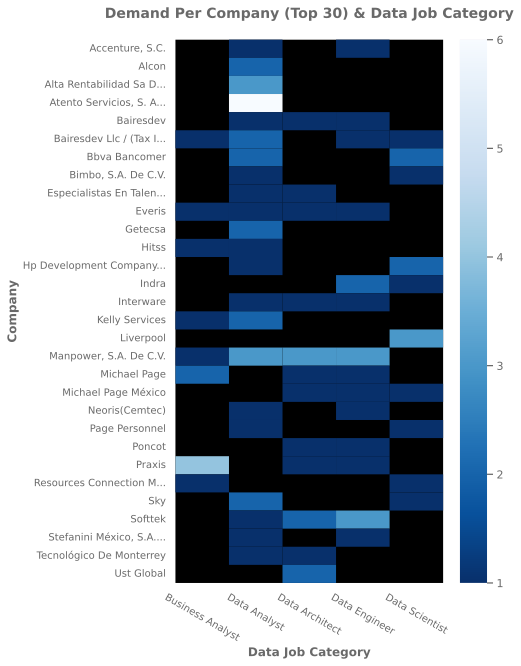

In [ ]:
# Heatmap with Matplotlib
plt.figure(figsize = (6,10))
formatter = mpl.ticker.StrMethodFormatter('{x:,.0f}')
ax = sns.heatmap(jobs_per_company_df, 
            cmap = "Blues_r",
            mask = (jobs_per_company_df == 0),
            cbar_kws={"format": formatter})
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.xlabel('Data Job Category')
plt.ylabel(f'Company')
plt.xticks(rotation = 330)
plt.title(f'Demand Per Company (Top {top_companies_data_jobs}) & Data Job Category\n')
plt.savefig('Figures/Fig6_DemandPerCompanyAndDataJobCategoryTop30MPL.png',  bbox_inches = 'tight')
plt.show()

Likewise, as heatmaps with Plotly require the dataset to be in a tidy (or long) form. The data was transformed once again using the method *melt* from Pandas.

In [ ]:
# Dataframe for Heatmap with top 30 companies demanding data jobs in tidy format
jobs_per_company_tidy_df = pd.melt(jobs_per_company_df.reset_index().sort_values('Company', ascending = False), 
                                  id_vars = 'Company', var_name = 'Job', value_name = 'Vacancies')
jobs_per_company_tidy_df.head()

Company               Job  Vacancies
0                 Ust Global  Business Analyst        0.0
1   Tecnológico De Monterrey  Business Analyst        0.0
2  Stefanini México, S.A....  Business Analyst        0.0
3                    Softtek  Business Analyst        0.0
4                        Sky  Business Analyst        0.0

In [ ]:
# Heatmap with Plotly
fig = px.density_heatmap(jobs_per_company_tidy_df, y='Company', 
                          x = 'Job', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=800,
                          width=750, 
                          title= f'Demand Per Company (Top {top_companies_data_jobs}) & Data Job Category ',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), 
                  font=font_px)
fig.write_image("Figures/Fig6_DemandPerCompanyAndDataJobCategoryTop30PX.png", scale=2)
fig.write_image("Figures/Fig6_DemandPerCompanyAndDataJobCategoryTop30PX.svg", scale=2)
fig.show(config=config)

From the plots above, it is possible to see that, indeed, **Data Analyst**, **Data Engineer** and **Data Scientist** positions are the ones **most demanded** by the companies in Mexico at the moment of this study; whereas **Data Architect** and **Business Analyst** positions are the **less demanded**.

Notwithstanding with the above, the heatmap suggests that **Business Analyst** and **Data Engineer** positions are more demanded across different organizations. On the contrary, **Data Scientist** and, certainly, **Data Architect** vacancies can be found in more specific organizations like tech consulting companies.

#### **Where do the companies demanding data jobs locate?**

To answer this question, a heatmap was drawn in order to show the location(s) of the companies demanding data jobs.

Likewise, a dataframe with the data for top 30 companies demanding data jobs was prepared by using the method *pivot_table* from Pandas. The vacancies without a disclosed company were removed from the dataset.

In [ ]:
# Dataframe for analyzing the location of the companies demanding data jobs
companies_by_location_df = (pd.pivot_table(data = df, index = 'Company', columns = 'Location', 
                          values = 'Job', aggfunc = 'count').transpose()
                        .join(states_df, how = 'outer').drop(columns =['ID', 'Lat', 'Long'])
                        .transpose().fillna(0).drop('Not Disclosed')
                        )     
companies_by_location_df['Total'] = companies_by_location_df.sum(axis=1, numeric_only= True)
companies_by_location_df.head()

Aguascalientes  Baja California  \
Accenture International               0.0              0.0   
Accenture, S.C.                       0.0              0.0   
Aceros Levinson S.A. D...             0.0              0.0   
Adecco                                0.0              0.0   
Ait Vanguardia Tecnoló...             0.0              0.0   

                           Baja California Sur  Campeche  Chiapas  Chihuahua  \
Accenture International                    0.0       0.0      0.0        0.0   
Accenture, S.C.                            0.0       0.0      0.0        0.0   
Aceros Levinson S.A. D...                  0.0       0.0      0.0        0.0   
Adecco                                     0.0       0.0      0.0        0.0   
Ait Vanguardia Tecnoló...                  0.0       0.0      0.0        0.0   

                           Ciudad de México  Coahuila  Colima  Durango  ...  \
Accenture International                 0.0       0.0     0.0      0.0  ...   
Accenture, S.C.                         0.0       0.0     0.0      0.0  ...   
Aceros Levinson S.A. D...               0.0       0.0     0.0      0.0  ...   
Adecco                                  2.0       0.0     0.0      0.0  ...   
Ait Vanguardia Tecnoló...               1.0       0.0     0.0      0.0  ...   

                           San Luis Potosí  Sinaloa  Sonora  Tabasco  \
Accenture International                0.0      0.0     0.0      0.0   
Accenture, S.C.                        0.0      0.0     0.0      0.0   
Aceros Levinson S.A. D...              0.0      0.0     0.0      0.0   
Adecco                                 0.0      0.0     0.0      0.0   
Ait Vanguardia Tecnoló...              0.0      0.0     0.0      0.0   

                           Tamaulipas  Tlaxcala  Veracruz  Yucatán  Zacatecas  \
Accenture International           0.0       0.0       0.0      0.0        0.0   
Accenture, S.C.                   0.0       0.0       0.0      1.0        0.0   
Aceros Levinson S.A. D...         0.0       0.0       0.0      0.0        0.0   
Adecco                            0.0       0.0       0.0      0.0        0.0   
Ait Vanguardia Tecnoló...         0.0       0.0       0.0      0.0        0.0   

                           Total  
Accenture International      1.0  
Accenture, S.C.              2.0  
Aceros Levinson S.A. D...    1.0  
Adecco                       2.0  
Ait Vanguardia Tecnoló...    1.0  

[5 rows x 34 columns]

In [ ]:
# All companies and its locations
all_companies_by_location_df = (companies_by_location_df.sort_values('Total', ascending = False)
                            .drop(columns = 'Total').reset_index().rename(columns = {'index': 'Company'})
                            .sort_values('Company', ascending = True).set_index('Company').astype(float)
                            .transpose().sort_index()
                            )
all_companies_by_location_df.head()

Company              Accenture International  Accenture, S.C.  \
Aguascalientes                           0.0              0.0   
Baja California                          0.0              0.0   
Baja California Sur                      0.0              0.0   
Campeche                                 0.0              0.0   
Chiapas                                  0.0              0.0   

Company              Aceros Levinson S.A. D...  Adecco  \
Aguascalientes                             0.0     0.0   
Baja California                            0.0     0.0   
Baja California Sur                        0.0     0.0   
Campeche                                   0.0     0.0   
Chiapas                                    0.0     0.0   

Company              Ait Vanguardia Tecnoló...  Alcon  \
Aguascalientes                             0.0    0.0   
Baja California                            0.0    0.0   
Baja California Sur                        0.0    0.0   
Campeche                                   0.0    0.0   
Chiapas                                    0.0    0.0   

Company              Alta Rentabilidad Sa D...  Ami International  \
Aguascalientes                             0.0                0.0   
Baja California                            0.0                0.0   
Baja California Sur                        0.0                0.0   
Campeche                                   0.0                0.0   
Chiapas                                    0.0                0.0   

Company              Atento Servicios, S. A...  Axented  ...  \
Aguascalientes                             0.0      0.0  ...   
Baja California                            0.0      0.0  ...   
Baja California Sur                        0.0      0.0  ...   
Campeche                                   0.0      0.0  ...   
Chiapas                                    0.0      0.0  ...   

Company              Universidad Mexicana  Universidad Tecnologic...  \
Aguascalientes                        0.0                        0.0   
Baja California                       0.0                        0.0   
Baja California Sur                   0.0                        0.0   
Campeche                              0.0                        0.0   
Chiapas                               0.0                        0.0   

Company              Ust Global  Visa  Von Der Heide  Wolters Kluwer  \
Aguascalientes              0.0   0.0            0.0             0.0   
Baja California             0.0   0.0            0.0             0.0   
Baja California Sur         0.0   0.0            0.0             0.0   
Campeche                    0.0   0.0            0.0             0.0   
Chiapas                     0.0   0.0            0.0             0.0   

Company              Workable Ats  Zegovia Rh Sa De Cv  Zemsania México  \
Aguascalientes                0.0                  0.0              0.0   
Baja California               0.0                  0.0              0.0   
Baja California Sur           0.0                  0.0              0.0   
Campeche                      0.0                  0.0              0.0   
Chiapas                       0.0                  0.0              0.0   

Company              Zurich Aseguradora Mex...  
Aguascalientes                             0.0  
Baja California                            0.0  
Baja California Sur                        0.0  
Campeche                                   0.0  
Chiapas                                    0.0  

[5 rows x 147 columns]

In [ ]:
# Top 30 companies demanding data jobs and its locations
top_companies_by_location = 30
top_companies_by_location_df = (companies_by_location_df
                                .sort_values('Total', ascending = False)[:top_companies_by_location]
                                .drop(columns = 'Total').reset_index()
                                .rename(columns = {'index': 'Company'})
                                .sort_values('Company', ascending = True)
                                .set_index('Company').astype(float)
                                )
top_companies_by_location_df.head()

Aguascalientes  Baja California  \
Company                                                      
Accenture, S.C.                       0.0              0.0   
Adecco                                0.0              0.0   
Alcon                                 0.0              0.0   
Alta Rentabilidad Sa D...             0.0              0.0   
Atento Servicios, S. A...             0.0              0.0   

                           Baja California Sur  Campeche  Chiapas  Chihuahua  \
Company                                                                        
Accenture, S.C.                            0.0       0.0      0.0        0.0   
Adecco                                     0.0       0.0      0.0        0.0   
Alcon                                      0.0       0.0      0.0        0.0   
Alta Rentabilidad Sa D...                  0.0       0.0      0.0        0.0   
Atento Servicios, S. A...                  0.0       0.0      0.0        0.0   

                           Ciudad de México  Coahuila  Colima  Durango  ...  \
Company                                                                 ...   
Accenture, S.C.                         0.0       0.0     0.0      0.0  ...   
Adecco                                  2.0       0.0     0.0      0.0  ...   
Alcon                                   2.0       0.0     0.0      0.0  ...   
Alta Rentabilidad Sa D...               3.0       0.0     0.0      0.0  ...   
Atento Servicios, S. A...               0.0       0.0     0.0      0.0  ...   

                           Quintana Roo  San Luis Potosí  Sinaloa  Sonora  \
Company                                                                     
Accenture, S.C.                     0.0              0.0      0.0     0.0   
Adecco                              0.0              0.0      0.0     0.0   
Alcon                               0.0              0.0      0.0     0.0   
Alta Rentabilidad Sa D...           0.0              0.0      0.0     0.0   
Atento Servicios, S. A...           0.0              0.0      0.0     0.0   

                           Tabasco  Tamaulipas  Tlaxcala  Veracruz  Yucatán  \
Company                                                                       
Accenture, S.C.                0.0         0.0       0.0       0.0      1.0   
Adecco                         0.0         0.0       0.0       0.0      0.0   
Alcon                          0.0         0.0       0.0       0.0      0.0   
Alta Rentabilidad Sa D...      0.0         0.0       0.0       0.0      0.0   
Atento Servicios, S. A...      0.0         0.0       0.0       0.0      0.0   

                           Zacatecas  
Company                               
Accenture, S.C.                  0.0  
Adecco                           0.0  
Alcon                            0.0  
Alta Rentabilidad Sa D...        0.0  
Atento Servicios, S. A...        0.0  

[5 rows x 33 columns]

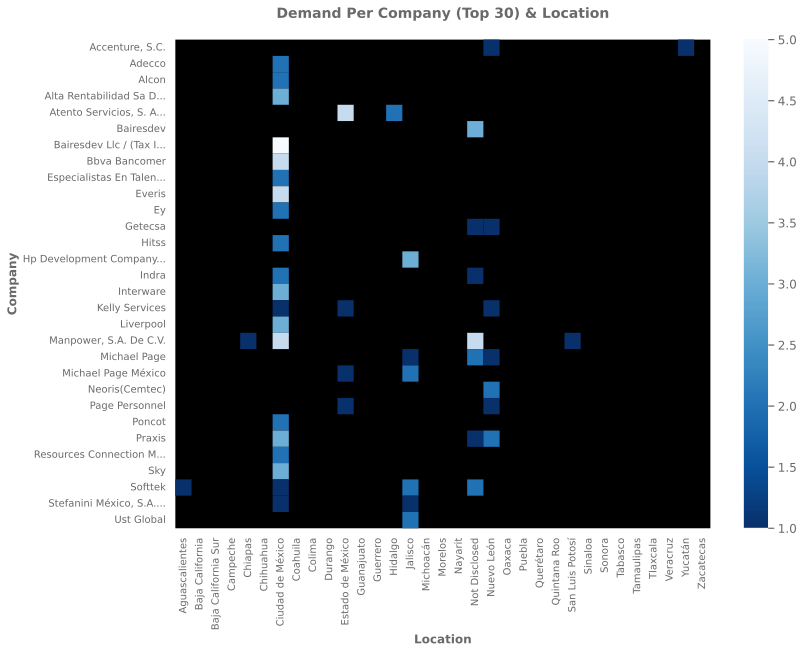

In [ ]:
# Heatmap of the top 30 companies demanding data jobs and their locations in Matplolib
plt.figure(figsize = (12,9))
ax = sns.heatmap(top_companies_by_location_df, 
            cmap = "Blues_r",
            mask = (top_companies_by_location_df == 0))
ax.set_facecolor('xkcd:black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.xlabel('Location')
plt.ylabel(f'Company')
plt.title(f'Demand Per Company (Top {top_companies_by_location}) & Location\n')
plt.savefig('Figures/Fig7_DemandPerCompanyAndLocationTop30MPL.png',  bbox_inches = 'tight')
plt.show()

Then, to use Plotly, the dataframe was converted into a tidy (or long) format.

In [ ]:
# Converting top 30 companies and their locations dataframe into tidy data
top_companies_by_location_tidy_df = pd.melt(top_companies_by_location_df.reset_index().sort_values(by = 'Company', ascending = False), 
                          id_vars = 'Company', var_name = 'Location', value_name = 'Vacancies')
top_companies_by_location_tidy_df.head()

Company        Location  Vacancies
0                 Ust Global  Aguascalientes        0.0
1  Stefanini México, S.A....  Aguascalientes        0.0
2                    Softtek  Aguascalientes        1.0
3                        Sky  Aguascalientes        0.0
4  Resources Connection M...  Aguascalientes        0.0

In [ ]:
# Heatmap of the top 30 companies demanding data jobs and their locations in Plotly
fig = px.density_heatmap(top_companies_by_location_tidy_df, y='Company', 
                          x = 'Location', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=800,
                          width=1100, 
                          title= f'Demand Per Company (Top {top_companies_by_location}) & Location'                          
                          )
fig.update_layout( title_x=0.5, 
                  coloraxis_colorbar=dict(title="Vacancies"), font=font_px)
fig.update_xaxes(tickangle = 270)
fig.write_image("Figures/Fig7_DemandPerCompanyAndLocationTop30PX.png", scale=2)
fig.write_image("Figures/Fig7_DemandPerCompanyAndLocationTop30PX.svg", scale=2)
fig.show(config=config)

As expectable, most of the companies locate in **Mexico City** as the large majority of the vacancies are offered there. However, the heatmap shows that there are some organizations that are spread across several Mexican states such as Praxis or Softek.

Futhermore, there are few well-known companies whose data jobs demand is not located in the capital region, such as HP which is located in Jalisco.


Let's take a look to the location of all companies demanding data jobs in February 2023.

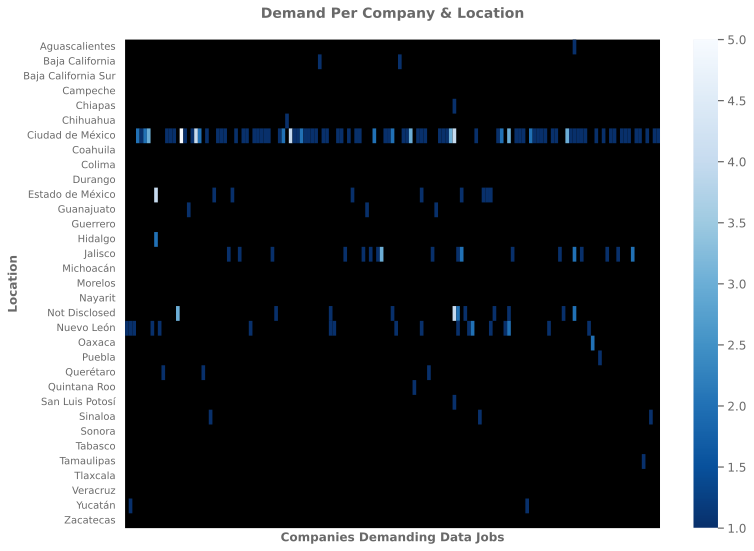

In [ ]:
# Heatmap of all companies demanding data jobs and their locations with Matplotlib
plt.figure(figsize = (12,9))
ax = sns.heatmap(all_companies_by_location_df, 
            cmap = "Blues_r",
            mask = (all_companies_by_location_df == 0))
ax.set_facecolor('xkcd:black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.xlabel('Companies Demanding Data Jobs')
plt.ylabel('Location')
plt.xticks([])
plt.title('Demand Per Company & Location\n')
plt.savefig('Figures/Fig8_DemandPerCompanyAndLocationMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Converting all companies and their locations dataframe into tidy data
all_companies_by_location_tidy_df = (all_companies_by_location_df.reset_index()
                                      .rename(columns = {'index': 'Location'})
                                      .set_index('Location')
                                      .transpose().reset_index()
                                      .sort_values('Company', ascending = True)
                                    )
all_companies_by_location_tidy_df = pd.melt(all_companies_by_location_tidy_df, 
                                            id_vars = 'Company', var_name= 'Location', 
                                            value_name = 'Vacancies').sort_values(by='Location', ascending = False)
all_companies_by_location_tidy_df.head()

Company   Location  Vacancies
4850  Zurich Aseguradora Mex...  Zacatecas        0.0
4758    G. De Villa Y Asociados  Zacatecas        0.0
4756               Fusemachines  Zacatecas        0.0
4755  Fundación Rafael Donde...  Zacatecas        0.0
4754         Farmacia San Pablo  Zacatecas        0.0

In [ ]:
# Heatmap of all companies demanding data jobs and their locations with Plotly
fig = px.density_heatmap(all_companies_by_location_tidy_df, y='Location', 
                          x = 'Company', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=800,
                          width=1000, 
                          title= 'Demand Per Company & Location',
                         )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=font_px)
fig.update_xaxes(showticklabels=False)
fig.write_image("Figures/Fig8_DemandPerCompanyAndLocationPX.png", scale=2)
fig.write_image("Figures/Fig8_DemandPerCompanyAndLocationPX.svg", scale=2)
fig.show(config=config)

Likewise, the above heatmap beautifully shows that most of the data jobs are concentrated in **Ciudad de México** and, to a lesser extent, in **Nuevo León** and **Jalisco**.

It is also important to bear in mind that, from now on, the second dataset with only the vacancies with disclosed salary information: **_salary_df_** was used for analysis.

#### **How many salary observations are for each data job category?**

To answer this question, a bar plot was drawn. And, to draw such a figure, the corresponding dataset was prepared by using the methods *groupby* and *count* from Pandas.

In [ ]:
# Count of observations per Data Job Category
obs_per_job_df = (salary_df.groupby('Job')[['Avg Salary']].count()
                  .rename(columns = {'Avg Salary': 'Observations'})
                  .sort_values('Observations', ascending = True)
                  )
obs_per_job_df.head()

Observations
Job                           
Data Architect               8
Business Analyst            10
Data Scientist              16
Data Engineer               21
Data Analyst                50

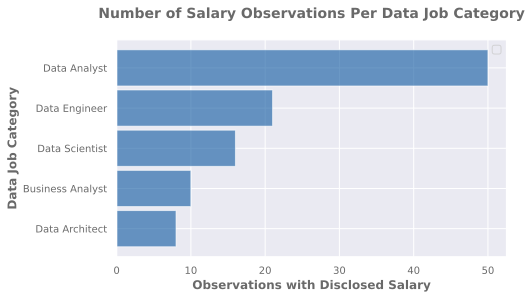

In [ ]:
# Bar plot of the salary observations per data job category in Matplotlib
obs_per_job_plt = obs_per_job_df.plot.barh(color = sns.color_palette('Blues_r')[0], 
                                           figsize = (7, 4), alpha = 0.6, width = 0.9)
plt.legend([])
plt.xlabel('Observations with Disclosed Salary')
plt.ylabel('Data Job Category')
plt.title('Number of Salary Observations Per Data Job Category\n')
plt.savefig('Figures/Fig9_NumberOfSalaryObservationsPerDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Bar plot of the salary observations per data job category in Plotly

# Defining bar colors
colors = ['#84BDEC',]*5
colors[0] = px.colors.sequential.Blues[8]

# Bar plot
fig = px.bar(obs_per_job_df.reset_index(), x='Observations', y='Job',
             color = 'Observations',
             color_continuous_scale=px.colors.sequential.Blues,
             title= 'Number of Salary Observations Per Data Job Category',
             labels={"Job": "Data Job Category"},
             height = 450,
             width = 700             
             )
fig.update_layout(title_x=0.5, font=font_px)
fig.update_traces(marker_color=colors, marker_line_color=px.colors.sequential.Blues[8],
                  marker_line_width=1, opacity=0.7)
fig.write_image("Figures/Fig9_NumberOfSalaryObservationsPerDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig9_NumberOfSalaryObservationsPerDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2449: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In view of the plots above, it is necessary to be careful with the salary results for the **Data Architect** positions, as less than 10 observations were collected.

#### **Which data job category has the highest salary?**

To answer this question, bar charts and boxplots were drawn based on the salaries for each data job category.

In [ ]:
# Dataframe with the Avg Monthly Salary per Data Job Category
salary_per_job_df = (salary_df.groupby('Job')[['Avg Salary']].mean()
                     .reset_index()
                     .sort_values('Avg Salary', ascending = False)
                    )
salary_per_job_df.head()

Job    Avg Salary
2    Data Architect  86562.500000
3     Data Engineer  49567.047619
4    Data Scientist  39687.500000
0  Business Analyst  32415.000000
1      Data Analyst  21240.190000

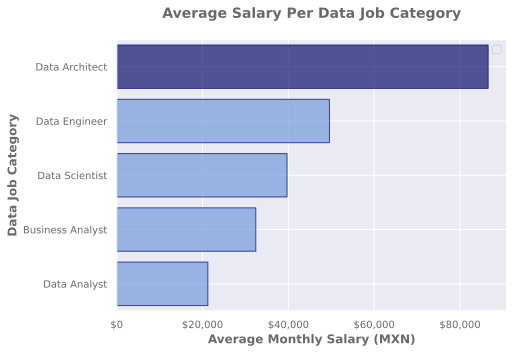

In [ ]:
# Average Salary per Data Job Category with Matplotlib
plt.figure(figsize = (7, 5))
ax = sns.barplot(data = salary_per_job_df, x = 'Avg Salary', y = 'Job', 
                 order = ['Data Architect', 'Data Engineer', 'Data Scientist', 'Business Analyst', 'Data Analyst'], 
                 palette = ['navy', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue'],
                 alpha = 0.7, edgecolor='navy')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.legend([])
plt.xlabel('Average Monthly Salary (MXN)')
plt.ylabel('Data Job Category')
plt.grid({'both'})
plt.title('Average Salary Per Data Job Category\n')
plt.savefig('Figures/Fig10_AverageSalaryPerDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Average Salary per Data Job Category with Plotly

colors = ['#84BDEC',]*5
colors[0] = px.colors.sequential.Blues[8]

order = ['Data Analyst', 'Business Analyst', 'Data Scientist', 'Data Engineer', 'Data Architect']

fig = px.bar(salary_per_job_df, x='Avg Salary', y='Job',
             color = 'Avg Salary',
             color_continuous_scale=px.colors.sequential.Blues,
             title= 'Average Salary Per Data Job Category',
             labels={"Job": "Data Job Category", 'Avg Salary': "Average Monthly Salary (MXN)"},
             height = 500,
             width = 700,
             opacity=0.8        
             )
fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray': order}, title_x=0.5, font=font_px)
fig.update_traces(marker_color=colors, marker_line_color=px.colors.sequential.Blues[8], marker_line_width=1)
fig.update_xaxes(tickformat = '$,~s')
fig.write_image("Figures/Fig10_AverageSalaryPerDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig10_AverageSalaryPerDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2449: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



From the bar charts above, it is clear that **Data Architect** positions are the data job category with the highest monthly average salary with about **$86,500 MXN**.

Furthermore, the second place corresponds to the **Data Engineer** positions with an average monthly salary of about **$49,500 MXN**. 

The rest of the data job positions have the following average monthly salaries:

* **Data Scientist**: $39,687

* **Business Analyst**: $32,415

* **Data Analyst**: $21,240

However, the calculated monthly average salaries might be affected by outliers. So, the monthly **median** salaries were estimated with the help of the boxplots below.

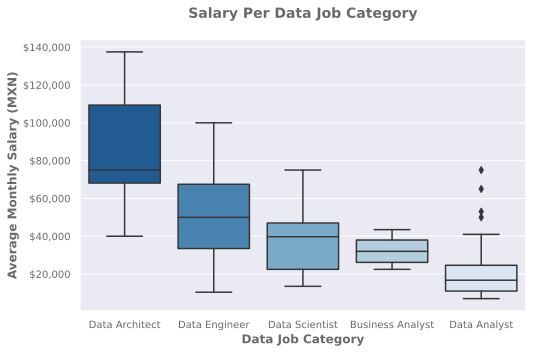

In [ ]:
# Box plot for each Data Job Category with Matplotlib
plt.figure(figsize = (8,5))
ax = sns.boxplot(data = salary_df, x = 'Job', y = 'Avg Salary', 
                 order = ['Data Architect', 'Data Engineer', 'Data Scientist', 'Business Analyst', 'Data Analyst'],
                 palette = 'Blues_r')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlabel('Data Job Category')
plt.ylabel('Average Monthly Salary (MXN)')
plt.title('Salary Per Data Job Category\n')
plt.savefig('Figures/Fig11_SalaryPerDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Box plot for each Data Job Category with Plotly

fig = px.box(salary_df, x = "Job", y = "Avg Salary", 
                          color = "Job", points="all", 
                          color_discrete_sequence=px.colors.sequential.Blues_r,
                          category_orders={"Job": ['Data Architect', 'Data Engineer', 'Data Scientist', 'Business Analyst', 'Data Analyst']},
                          labels={
                                  "Avg Salary": "Average Monthly Salary (MXN)",
                                  "Job": "Data Job Category"},
                          title='Salary Per Data Job Category',
                          height=550,
                          width=750
                          )
fig.update_layout(title_x=0.5, font=font_px)
fig.update_traces(showlegend=False)
fig.update_yaxes(tickformat = '$,~s')
fig.write_image("Figures/Fig11_SalaryPerDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig11_SalaryPerDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

The boxplot suggests that, after removing outliers from the calculation of the salaries distributions, **Data Architect** positions are still the ones with the highest salaries in the current Mexican labor market with a monthly median salary of about **75,000 MXN**. 

The second monthly highest median salary correspond to **Data Engineer** positions with about **50,000 MXN**. 

On the other hand, it was found that **Data Scientist** and **Business Analyst** positions have a median monthly salary of about **39,750 MXN** and about  **32,000 MXN**, respectively.

Finally, **Data Analyst** positions are the ones with the lowest salaries in the Data Jobs labor market with only a median monthly salary of about **16,750 MXN**.  

Please refer to the section **_5. Statistical Analysis_** below of the present notebook for a set of statistical tests applied to the salaries of each data job category.

#### **Where the highest salaries can be found?**

To answer this question, a heatmap was drawn to show the relationship among location, data job category and average salary. 

To do so, the appropriate dataframe was build using the methods *pivot_table* and *join* from Pandas. In this sense, the pivot salary table by location was joined with the states dataframe in order to display all the states within Mexico, and not only those with vacancies. Moreover, not disclosed locations were removed.

Finally, heatmaps were drawn using Matplotlib and Plotly. 

In [ ]:
# Dataframe with averages salaries per location and data job category
salary_location_df = (pd.pivot_table(data = salary_df, index = 'Location', 
                                     columns = 'Job', values = 'Avg Salary', 
                                     aggfunc= 'mean')
                      .join(states_df, how = 'outer').drop(columns =['ID', 'Lat', 'Long'])
                      .fillna(0).sort_index(ascending= True).drop('Not Disclosed')
                      )
salary_location_df.head()

Business Analyst  Data Analyst  Data Architect  \
Aguascalientes                    0.0           0.0             0.0   
Baja California                   0.0       31000.0             0.0   
Baja California Sur               0.0           0.0             0.0   
Campeche                          0.0           0.0             0.0   
Chiapas                           0.0       12000.0             0.0   

                     Data Engineer  Data Scientist  
Aguascalientes                 0.0             0.0  
Baja California                0.0             0.0  
Baja California Sur            0.0             0.0  
Campeche                       0.0             0.0  
Chiapas                        0.0             0.0

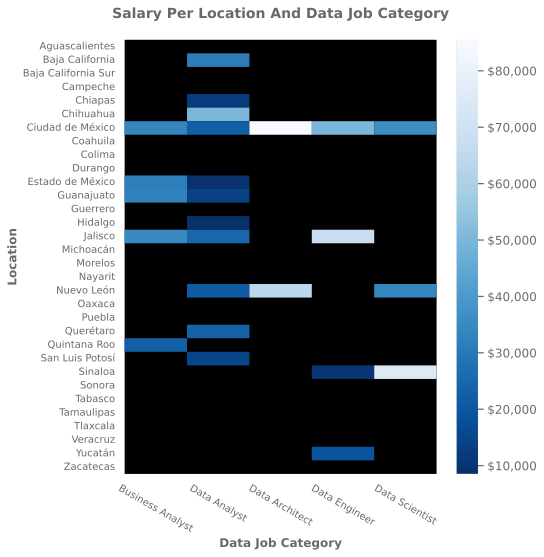

In [ ]:
# Heatmap of the Salaries per Data Job category and Location with Matplotlib
plt.figure(figsize = (7,8))
formatter = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax = sns.heatmap(salary_location_df, 
            cmap = "Blues_r",
            mask = (salary_location_df == 0),
            cbar_kws={"format": formatter})
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.xlabel('Data Job Category')
plt.ylabel('Location')
plt.title(f'Salary Per Location And Data Job Category\n')
plt.xticks(rotation = 330)
plt.savefig('Figures/Fig12_SalaryPerLocationAndDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Transforming dataframe into tidy format
salary_location_tidy_df = salary_location_df.rename_axis('Location').reset_index()
salary_location_tidy_df = pd.melt(salary_location_tidy_df, id_vars= 'Location', var_name = 'Job', value_name = 'Salary')
salary_location_tidy_df = salary_location_tidy_df.sort_values('Location', ascending = False)
salary_location_tidy_df.head()

Location               Job  Salary
159  Zacatecas    Data Scientist     0.0
63   Zacatecas      Data Analyst     0.0
95   Zacatecas    Data Architect     0.0
127  Zacatecas     Data Engineer     0.0
31   Zacatecas  Business Analyst     0.0

In [ ]:
# Heatmap of the Salaries per Data Job category and Location with Plotly

fig = px.density_heatmap(salary_location_tidy_df, y='Location', x = 'Job', z = 'Salary',
                          histfunc="avg", 
                          color_continuous_scale=heatmap_px_colorscale,
                          #color_continuous_scale="Blues",
                          height=800,
                          width=750,
                          title='Salary Per Location And Data Job Category',
                          labels={
                                  'Job': 'Data Job Category'
                                  }
                          )
fig.update_layout(title_x=0.5, font=font_px, coloraxis_colorbar=dict(title="Mth. Salary (MXN)"))
fig.update_traces(colorbar_title_text='Monthly Salary (MXN)')
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 
                                                        'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.write_image("Figures/Fig12_SalaryPerLocationAndDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig12_SalaryPerLocationAndDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

In general, the above plot suggests that the highest salaries can be found in **Mexico City, Nuevo León, Jalisco and Sinaloa**. However the observation for the latter state is atypical and should be interpreted with caution.

More specifically, the highest salaries for the different data jobs categories can be found in the following states:

Data Job Category | Locations with the Highest Average Salaries
---|---
Business Analyst | Ciudad de México
Data Analyst | Chihuahua
Data Architect | Ciudad de México
Data Engineer | Jalisco
Data Scientist | Sinaloa

#### **What companies offer the highest salaries?**

To answer this question, a lollipop chart was drawn using the top average salaries per company by using the *grouby* method from Pandas.

In [ ]:
# Dataframe with the top averages salaries per company
top_salary_company = 20
salary_company_df = (salary_df.groupby('Company')[['Avg Salary']].mean()
                    .drop('Not Disclosed')
                    .sort_values('Avg Salary', ascending = False)[:top_salary_company]                     
                    )
salary_company_df.head()

Avg Salary
Company                              
Especialistas En Talen...     87500.0
Resources Connection M...     75000.0
Reclutamiento En Tecno...     75000.0
Zemsania México               75000.0
Zegovia Rh Sa De Cv           75000.0

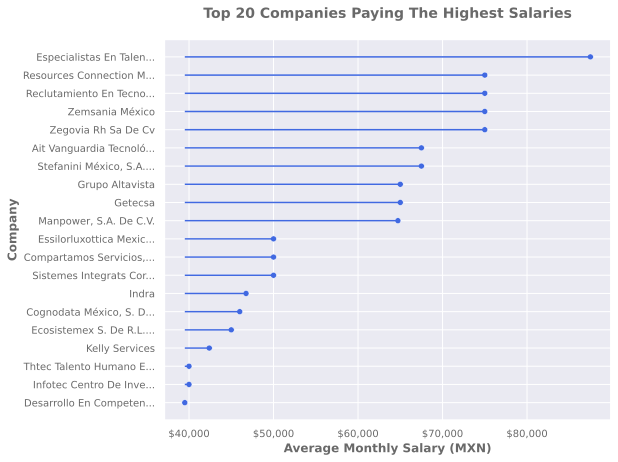

In [ ]:
# Companies paying the highest salaries with Matplotlib
plt.figure(figsize = (8,7))
ax = sns.scatterplot(data = salary_company_df,
                    x = 'Avg Salary',
                    y = 'Company',
                    color = 'royalblue'
                    )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

for index, value in salary_company_df.sort_values('Avg Salary')['Avg Salary'].iteritems():
    plt.hlines(xmax = value, xmin = np.min(salary_company_df['Avg Salary']), y = index, color='royalblue')  # Stems

plt.xlabel('Average Monthly Salary (MXN)')
plt.ylabel(f'Company')
plt.xticks(rotation = 0)
plt.title(f'Top {top_salary_company} Companies Paying The Highest Salaries\n')
plt.savefig('Figures/Fig13_Top20SalaryPerCompanyMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Companies paying the highest salaries with Plotly
fig = px.scatter(salary_company_df.reset_index().sort_values('Avg Salary'), 
                 x='Avg Salary', y='Company',
                 height = 700,
                 width = 800,
                 title = f'Top {top_salary_company} Companies Paying The Highest Salaries',
                 labels = {'Avg Salary':'Average Monthly Salary (MXN)'},
                 )

fig.update_layout(title_x=0.5, font=font_px)
fig.update_traces(marker_color=px.colors.sequential.Blues[7], marker_line_color=px.colors.sequential.Blues[7])
fig.update_xaxes(tickformat = '$,~s')

for index, value in salary_company_df.sort_values('Avg Salary')['Avg Salary'].iteritems():
  fig.add_shape(type='line', y0=index, y1= index, x0=np.min(salary_company_df['Avg Salary']), x1= value, xref='x',
                yref='y', line=dict(color= px.colors.sequential.Blues[7]))
  
fig.write_image("Figures/Fig13_Top20SalaryPerCompanyPX.png", scale=2)
fig.write_image("Figures/Fig13_Top20SalaryPerCompanyPX.svg", scale=2)
fig.show(config=config)

From the plot aboves, the companies offering the highest salaries are *Especialistas en Talento*, *Zemsania México*, *Resources Connection México*, *Zegovia RH*, and *Reclutamiento en Tecnología*. From those, 3 are recruiting agencies and 2 are tech consulting firms.

#### **What companies offer the highest salaries per data job category?**

To answer this question, a heatmap was drawn to show the relationship among company, data job category and average salary. 

To do so, the appropriate dataframe was build using the methods *pivot_table* and *join* from Pandas. Moreover, not disclosed employers were removed.

Finally, heatmaps were drawn using Matplotlib and Plotly. 

In [ ]:
# Dataframe with averages salaries per company and data job category
top_salary_company_per_data_job = 30
salary_company_per_data_job_df = (pd.pivot_table(data = salary_df, index = 'Company', 
                                     columns = 'Job', values = 'Avg Salary', 
                                     aggfunc= 'mean')                      
                      .fillna(0).sort_index(ascending= True).drop('Not Disclosed')
                      )
salary_company_per_data_job_df['Total Average'] = (salary_company_per_data_job_df[salary_company_per_data_job_df > 0]
                                                  .mean(axis=1, numeric_only= True))
salary_company_per_data_job_df = (salary_company_per_data_job_df
                     .sort_values('Total Average', ascending = False)[:top_salary_company_per_data_job]
                     .sort_index(ascending= True)
                    )
salary_company_per_data_job_df.head()

Job                        Business Analyst  Data Analyst  Data Architect  \
Company                                                                     
Ait Vanguardia Tecnoló...               0.0           0.0             0.0   
Cognodata México, S. D...               0.0           0.0             0.0   
Compartamos Servicios,...               0.0           0.0             0.0   
Desarrollo En Competen...               0.0           0.0             0.0   
Ecosistemex S. De R.L....               0.0           0.0             0.0   

Job                        Data Engineer  Data Scientist  Total Average  
Company                                                                  
Ait Vanguardia Tecnoló...        67500.0             0.0        67500.0  
Cognodata México, S. D...            0.0         46000.0        46000.0  
Compartamos Servicios,...            0.0         50000.0        50000.0  
Desarrollo En Competen...            0.0         39500.0        39500.0  
Ecosistemex S. De R.L....        45000.0             0.0        45000.0

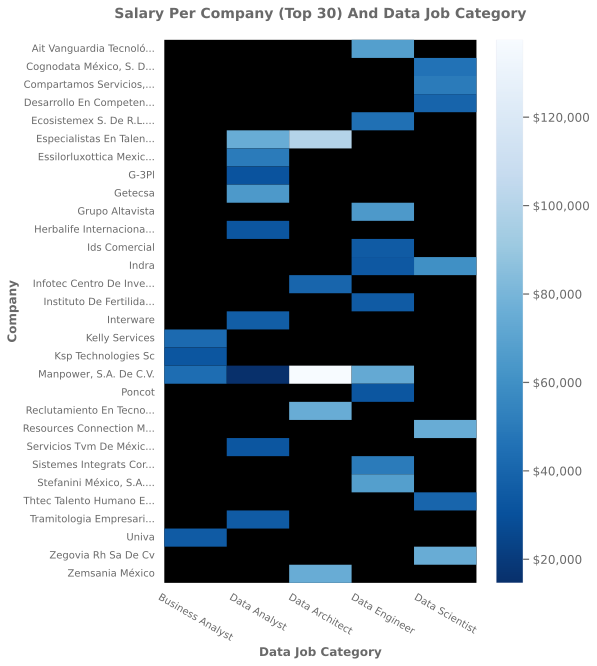

In [ ]:
# Heatmap of the Companies Offering the Highest Salaries Per Data Job Category with Matplolib
plt.figure(figsize = (7,10))
formatter = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax = sns.heatmap(data = salary_company_per_data_job_df.drop(columns = 'Total Average'),
                cmap = 'Blues_r',
                mask = (salary_company_per_data_job_df.drop(columns = 'Total Average') == 0),
                cbar_kws={"format": formatter}
                )
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.xlabel('Data Job Category')
plt.ylabel('Company')
plt.title(f'Salary Per Company (Top {top_salary_company_per_data_job}) And Data Job Category\n')
plt.xticks(rotation = 330)
plt.savefig('Figures/Fig14_SalaryPerCompanyAndDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Converting dataframe into a tidy format
salary_company_per_data_job_tidy_df = (salary_company_per_data_job_df.copy().drop(columns = 'Total Average')
                          .reset_index()
                          )
salary_company_per_data_job_tidy_df = pd.melt(salary_company_per_data_job_tidy_df,
                                 id_vars = 'Company', var_name = 'Job', value_name = 'Salary')
salary_company_per_data_job_tidy_df.head()

Company               Job  Salary
0  Ait Vanguardia Tecnoló...  Business Analyst     0.0
1  Cognodata México, S. D...  Business Analyst     0.0
2  Compartamos Servicios,...  Business Analyst     0.0
3  Desarrollo En Competen...  Business Analyst     0.0
4  Ecosistemex S. De R.L....  Business Analyst     0.0

In [ ]:
# Heatmap of the Companies Offering the Highest Salaries Per Data Job Category with Plotly
fig = px.density_heatmap(salary_company_per_data_job_tidy_df.sort_values(by = 'Company', ascending = False), 
                          y='Company', x = 'Job', z = 'Salary',
                          histfunc="avg", 
                          color_continuous_scale=heatmap_px_colorscale,
                          #color_continuous_scale="Blues",
                          height=900,
                          width=850, 
                          title= f'Salary Per Company (Top {top_salary_company_per_data_job}) And Data Job Category',
                          labels={"Job": "Data Job Category"}
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Mth. Salary (MXN)"), font=font_px)
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.write_image("Figures/Fig14_SalaryPerCompanyAndDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig14_SalaryPerCompanyAndDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

For **Business Analyst** positions, the organizations offering higher salaries are *Kelly Services* and *Manpower*.

Moreover, for **Data Analyst** positions, the organizations offering higher salaries are *Especialistas en Talento* and *Getecsa*.

Furthermore, for **Data Architect** positions, the organizations offering higher salaries are *Manpower* and *Especialistas en Talento*.

In addition, for **Data Engineer** positions, the organizations offering higher salaries are *Manpower*, *Ait Vanguardia Tecnológica*, and *Stefanini México*.

Finally, for **Data Scientist** positions, the organizations offering higher salaries are *Resources Connection* and *Zegovia Rh*.

___
## **6. Statistical Analysis** <a class="anchor" id="statistics"></a>
___

In this section, the **D'Agostino-Pearson normality test** was used to assess the normality of the data jobs salary distribution. Then, both parametric (**ANOVA** and **t-test with unequal variance**) and non-parametric (**Kruskal-Wallis H** and **Mann-Whitney U**) tests were carried out to assess the significance of the obtained mean salaries per data job category.

Finally, an effect size analysis was also carried out by computing the **absolute mean salary difference**, the **Cohen's d**, and the **bootstrap confidence intervals** for each data job category. This, in order to assess whether the salary differences are significant from a practical point of view.

#### **How is the salary distribution of the data jobs?**

To answer this question, a histogram was drawn with the retrieved salary data.

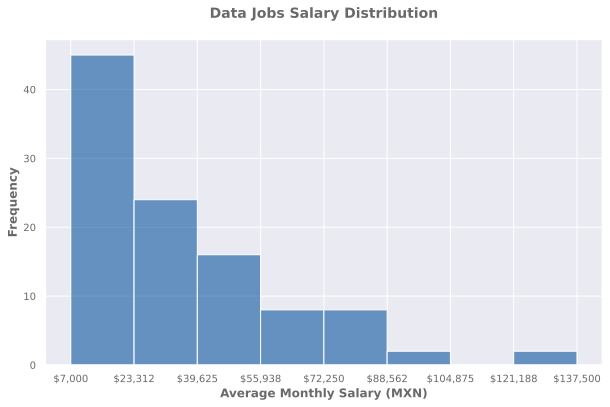

In [ ]:
# Histogram with Matplolib

bins = 8

minh = np.min(salary_df['Avg Salary'])
maxh = np.max(salary_df['Avg Salary'])

plt.figure(figsize = (10, 6))
ax = sns.histplot(data = salary_df, x = 'Avg Salary', 
                 color = sns.color_palette('Blues_r')[0],
                 bins = bins,
                 alpha = 0.6
                )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlabel('Average Monthly Salary (MXN)')
plt.ylabel('Frequency')
plt.xticks(np.linspace(minh,maxh, bins + 1))
plt.title('Data Jobs Salary Distribution\n')
plt.grid({'both'})
plt.savefig('Figures/Fig15_DataJobsSalaryDistributionMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Histogram with Plotly

size = ( maxh - minh )/bins

ticks = list(np.linspace(minh,maxh,bins + 1))

fig = px.histogram(salary_df, x = 'Avg Salary', nbins= bins, opacity=0.6, 
                   color_discrete_sequence = [px.colors.sequential.Blues_r[0]],
                   title= 'Data Jobs Salary Distribution',
                   labels={"Avg Salary": "Average Monthly Salary (MXN)"},
                   height = 600,
                   width = 800                   
                   )
fig.update_layout(yaxis_title_text='Frequency', bargap=0.01, title_x=0.5, 
                  font=font_px)
fig.update_traces(xbins=dict( # bins used for histogram
                  start=minh,
                  end=maxh,
                  size=size
                  ))
fig.update_xaxes(tickvals=ticks, tickformat = '$,~s')
fig.write_image("Figures/Fig15_DataJobsSalaryDistributionPX.png", scale=2)
fig.write_image("Figures/Fig15_DataJobsSalaryDistributionPX.svg", scale=2)
fig.show(config=config)

Most of the Data Jobs salaries are located in the range from $7,000 MXN to $23,312 MXN per month, whereas monthly salaries superior to $39,625 MXN are more scarce. 

On the other hand, it is noteworthy that the salary distributions is skewed to the right. So, it might not comply with the **normality assumption.**

#### **Are the salary observations following a normal distribution?**

To answer this question, a **D’Agostino-Pearson test of normal distribution** was carried out.

$$\mathbf{H_0}: Normal \; Distribution$$ 

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [ ]:
# D’Agostino-Pearson test of normal distribution
stat, pvalue = stats.normaltest(salary_df['Avg Salary'])
print(f'The K2 statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.')

The K2 statistic is: 39.029. 
The p-value is: 0.000.


Indeed, as the *p*-value is significant ($p < 0.05$), the null hypothesis that the sample comes from a normal distribution is **rejected**. 

#### **How are the salary distributions by data job category?**

To answer this question, multiple histograms were drawn with the salary data for each data job category.

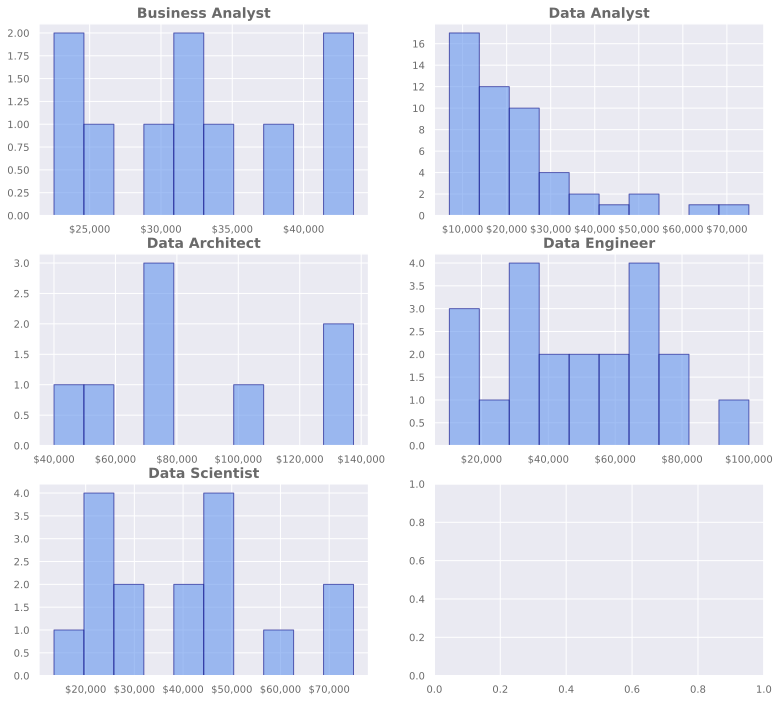

In [ ]:
# Multiple histograms with Matplolib
figure, axis = plt.subplots(nrows=3, ncols=2, figsize = (13,12))
axis[0, 0].hist(salary_df.loc[salary_df['Job'] == 'Business Analyst']['Avg Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.6)
axis[0, 0].set_title("Business Analyst")
axis[0, 0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axis[0, 1].hist(salary_df.loc[salary_df['Job'] == 'Data Analyst']['Avg Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.6)
axis[0, 1].set_title("Data Analyst")
axis[0, 1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axis[1, 0].hist(salary_df.loc[salary_df['Job'] == 'Data Architect']['Avg Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.6)
axis[1, 0].set_title("Data Architect")
axis[1, 0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axis[1, 1].hist(salary_df.loc[salary_df['Job'] == 'Data Engineer']['Avg Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.6)
axis[1, 1].set_title("Data Engineer")
axis[1, 1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axis[2, 0].hist(salary_df.loc[salary_df['Job'] == 'Data Scientist']['Avg Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.6)
axis[2, 0].set_title("Data Scientist")
axis[2, 0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.savefig('Figures/Fig16_SalaryDistributionsPerDataJobCategoryMPL.png',  bbox_inches = 'tight')
plt.show()

In [ ]:
# Multiple histograms with Plotly
bins = 10
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Data Analyst", "Business Analyst", "Data Architect", "Data Engineer", "Data Scientist"),
    specs=[[{"colspan": 2}, None],
           [{}, {}],                 
           [{}, {}]]
    )

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Analyst']['Avg Salary'], nbinsx= bins),
              row=1, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Business Analyst']['Avg Salary'], nbinsx= bins),
              row=2, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Architect']['Avg Salary'], nbinsx= bins),
              row=2, col=2)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Engineer']['Avg Salary'], nbinsx= bins),
              row=3, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Scientist']['Avg Salary'], nbinsx= bins),
              row=3, col=2)

fig.update_layout(height=900, width=800, font=font_px,
                  title_text="Salary Distributions Per Data Job Category",
                  title_x=0.5,
                  bargap=0.02 
                  )
fig.update_traces(marker_color=px.colors.sequential.Blues[8], marker_line_color=px.colors.sequential.Blues[8], 
                  marker_line_width=1, opacity = 0.6, showlegend=False)
fig.update_xaxes(tickformat = '$,~s')
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=1, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=2, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=2, col=2)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=3, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=3, col=2)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=3, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=3, col=2)
fig.write_image("Figures/Fig16_SalaryDistributionsPerDataJobCategoryPX.png", scale=2)
fig.write_image("Figures/Fig16_SalaryDistributionsPerDataJobCategoryPX.svg", scale=2)
fig.show(config=config)

Indeed, only the salary observations for the **Data Scientist** and **Data Engineer** positions somewhat resemble a normal distribution, whereas it is not possible to state the same with the observations for the other data job categories. Thus a normal assumption cannot be hold.

Nonetheless, for the purposes of the present study, both parametric (**ANOVA and T-test with unequal variance**) and non-parametric (**Kruskal-Wallis H and Mann-Whitney U**) tests were carried out to assess the significance of the obtained results.

#### **Are the salary differences among Data Jobs statistically significant?**

To answer this question, an **ANOVA** and a **Kruskal-Wallis H test** were performed on the salary data.

$$\mathbf{H_0}: \mu_{BA} = \mu_{DA} = \mu_{DR} = \mu_{DE} = \mu_{DS}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

First, the salary observations for each data job category were prepared from the dataset using the *pivot_table* method from Pandas.

In [ ]:
# Salary pivot table by data job category
salary_pivot_df = pd.pivot_table(salary_df, index = 'Company', columns = 'Job', values = 'Avg Salary', aggfunc= 'mean')
salary_pivot_df.head()

Job                        Business Analyst  Data Analyst  Data Architect  \
Company                                                                     
Aceros Levinson S.A. D...               NaN       22500.0             NaN   
Adecco                              39000.0       22500.0             NaN   
Ait Vanguardia Tecnoló...               NaN           NaN             NaN   
Alta Rentabilidad Sa D...               NaN        7500.0             NaN   
Atento Servicios, S. A...               NaN        8535.0             NaN   

Job                        Data Engineer  Data Scientist  
Company                                                   
Aceros Levinson S.A. D...            NaN             NaN  
Adecco                               NaN             NaN  
Ait Vanguardia Tecnoló...        67500.0             NaN  
Alta Rentabilidad Sa D...            NaN             NaN  
Atento Servicios, S. A...            NaN             NaN

Then, a Numpy array was defined for each data job category and the NaN values were dropped.

In [ ]:
# Array of salary observations by data job category
BA = salary_pivot_df['Business Analyst'].dropna().values
DA = salary_pivot_df['Data Analyst'].dropna().values
DR = salary_pivot_df['Data Architect'].dropna().values
DE = salary_pivot_df['Data Engineer'].dropna().values
DS = salary_pivot_df['Data Scientist'].dropna().values

Then, the parametric **ANOVA** test was carried out:

In [ ]:
# ANOVA with outliers
stat, pvalue = stats.f_oneway(BA, DA, DR, DE, DS)

print(f'The F statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.\n')

alpha = 0.05
if pvalue > alpha:
	print('Test interpretation: Fail to reject H0.')
else:
	print('Test interpretation: Reject H0.')

The F statistic is: 13.963. 
The p-value is: 0.000.

Test interpretation: Reject H0.


In [ ]:
# ANOVA using the Statsmodels Formula API
model = smf.ols(formula = "Salary ~ C(Job)", data = salary_df.rename(columns = {'Avg Salary': 'Salary'})).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df         F        PR(>F)
C(Job)    3.555042e+10    4.0  24.72355  3.030677e-14
Residual  3.594793e+10  100.0       NaN           NaN

Moreover, the non-parametric **Kruskal-Wallis H test** was also performed:

In [ ]:
# Kruskal-Wallis H Test
stat, pvalue = stats.kruskal(BA, DA, DR, DE, DS)

print(f'The H statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.\n')

alpha = 0.05
if pvalue > alpha:
	print('Test interpretation: Fail to reject H0.')
else:
	print('Test interpretation: Reject H0.')

The H statistic is: 27.973. 
The p-value is: 0.000.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the salary differences among the different data jobs are statistically significant.


#### **Are the Data Architect salaries significantly higher than those for Data Scientists?**

To answer this question, the **T-test with unequal variance** and the **Mann-Whitney U test** were performed based on the salary observations for that pair of data jobs categories.

$$\mathbf{H_0}: \mu_{DR} ≤ \mu_{DS}$$

$$\mathbf{H_1}: \mu_{DR} > \mu_{DS}$$

$$\alpha = 0.05$$

As the  **T-tests with unequal variance** and the **Mann-Whitney U tests** were carried out several times to compare the mean salaries of the different data jobs categories, a function was defined as follows:

In [ ]:
# Function to compare the mean salaries using a T-test and the Mann-Whitney U test
def compare_means(sample1, sample2, alternative, equal_var = False, alpha = 0.05):
    """
    This functions performs both the T-test and the Mann-Whitney U test
    to compare the means of two independent samples.

    Parameters

    sample1: First sample array.

    sample2: Second sample array.

    alternative: Alternative hypothesis. If 'greater', the mean of the distribution 
    underlying the first sample is greater than the mean of the distribution underlying 
    the second sample. If 'less', the mean of the distribution underlying the first 
    sample is less than the mean of the distribution underlying the second sample. 
    Finally, if ‘two-sided’, the means of the distributions underlying the samples are unequal.
    
    equal_var: If True, the test performs a standard independent 2 sample test that 
    assumes equal population variances. If False (default), perform Welch’s t-test, 
    which does not assume equal population variance.
    
    alpha: Significance level. It is 0.05 by default.

    Returns

    stat_t: The calculated t-statistic.

    pvalue_t: The associated p-value or the chosen alternative from the t-test.

    stat_u: The Mann-Whitney U statistic corresponding with the first sample.

    pvalue_u: The associated p-value for the chosen alternative from the Mann-Whitney U test.

    """
    # t-test
    stat_t, pvalue_t = stats.ttest_ind(a = sample1, b = sample2, equal_var = equal_var, alternative = alternative)

    # Mann-Whitney U test
    stat_u, pvalue_u = stats.mannwhitneyu(x = sample1, y = sample2, alternative = alternative)

    # Print of results
    print(f'T-test: The t statistic is {stat_t:.03f}; and the p-value is {pvalue_t:.03f}.\n')
    print(f'Mann-Whitney U test: The U statistic is {stat_u:.03f}; and the p-value is {pvalue_u:.03f}.\n')

    # Interpretation
    alpha = 0.05
    if pvalue_t > alpha and pvalue_u > alpha:
      print('Test interpretation: Fail to reject H0.')
    elif pvalue_t < alpha and pvalue_u < alpha:
      print('Test interpretation: Reject H0.')
    else:
        print('Inconsistent results between the tests.')
    
    return stat_t, pvalue_t, stat_u, pvalue_u

In [ ]:
# Comparing Data Architect and Data Scientist salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DR, DS, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 2.864; and the p-value is 0.013.

Mann-Whitney U test: The U statistic is 74.500; and the p-value is 0.004.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Architect** salaries are **significantly higher** than those for **Data Scientists**.

Then, the difference between the mean salaries for each data job category were calculated in order to quantify the size of the effect as well as the confidence intervals.

However, as the salary observations do not follow a Gaussian distribution, the confidence intervals for the mean were estimated using **bootstrapping** and the effect size was primarily calculated in **absolute** terms. Nonetheless, for sake of completeness, **Cohen's d** was also estimated.

Likewise, as the effect size was estimated several times for each data job salary comparison, several functions were defined as follows:

In [ ]:
# Function for estimating the Absolute Effect Size
def absolute_effect_size(sample1, sample2):
    """
    This functions estimates the effect size of the two mean samples by calculating the 
    absolute difference between them.

    Parameters

    sample1: First sample array.

    sample2: Second sample array.

    Returns

    abs_effect_size: The absolute effect size of the two mean samples.

    """

    abs_effect_size = abs(np.mean(sample1) - np.mean(sample2))
    
    return abs_effect_size

In [ ]:
# Function for estimating the Standardized Effect Size (Cohen's d)
def cohens_d(sample1, sample2):
    """
    This functions estimates the standardized effect size of the two mean samples 
    by calculating the Cohen's d.

    Parameters

    sample1: First sample array.

    sample2: Second sample array.

    Returns

    d: The standardized effect size of the two mean samples (Cohen's d).

    """

    # Lenght of the samples
    n1, n2 = len(sample1), len(sample2)

    # Variances of the samples
    s1, s2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)

    # Pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    # Mean of the samples
    u1, u2 = np.mean(sample1), np.mean(sample2)

    # Cohen's d
    d = (u1 - u2) / s
    
    return d

In [ ]:
# Function for estimating the bootstrap confidence intervals
def boot_conf_int(sample, alpha = 0.05, iterations = 1000):
    """
    This functions estimates the bootstrap confidence intervals of a sample mean.

    Parameters

    sample: Sample array.
       
    alpha: Significance level. It is 0.05 by default.

    iterantions: Number of iterations. It is 1000 by default.

    Returns

    stats: List with the estimated statistics.

    lower_ci: Lower confidence interval.

    upper_ci: Upper confidence interval.

    
    """

    n_iterations = iterations
    n_size = int(len(sample) * 0.50)
    stats = []

    for i in range(n_iterations):
        new_sample = resample(sample, n_samples=n_size)
        mean_stat = np.mean(new_sample)
        stats.append(mean_stat)

    p = (alpha / 2) * 100
    lower_ci = np.percentile(stats, p)
    p = ((1 - alpha) + (alpha / 2)) * 100
    upper_ci = np.percentile(stats, p)      
 
    return stats, lower_ci, upper_ci

In [ ]:
# Function for estimating the Effect Size
def effect_size(sample1, sample2, legend1 = "Sample 1", legend2 = "Sample 2", alpha = 0.05):
    """
    This functions estimates the effect size of the two mean samples by calculating the 
    absolute effect size, the Cohen's d, and the bootstrap confidence intervals.

    Parameters

    sample1: First sample array.

    sample2: Second sample array.

    legend1: String with the legend for the sample 1.

    legend2: String with the legend for the sample 2.
    
    alpha: Significance level. It is 0.05 by default.

    Returns

    None

    """

    # Absolute Effect Size
    abs_effect_size = absolute_effect_size(sample1, sample2)
    print(f'The mean salary difference between the two data job categories is: ${abs_effect_size:,.0f}.\n')

    # Standardized Effect Size (Cohen's d)
    d = cohens_d(sample1, sample2)

    # Interpretation of Cohen's d
    print(f"The Cohen's d between the two data job categories is: {d:,.2f}.")
    if d <= 0.20:
      print(f"(Small Effect Size)\n")
    elif d <= 0.50:
      print(f"(Medium Effect Size)\n")
    else:
      print(f"(Large Effect Size)\n")
    
    # Legends list
    legends = [legend1, legend2]

    # Adding plot
    fig, ax = plt.subplots(figsize = (9, 5))

    for index, sample in enumerate([sample1, sample2]):
      
      # Bootstrap confidence intervals
      stats, lower_ci, upper_ci = boot_conf_int(sample, alpha = alpha, iterations = 1000)

      print(f"{legends[index]}'s Salary --> {(1 - alpha)*100}% Confidence Interval: (${lower_ci:,.0f}, ${upper_ci:,.0f})")

      
      ax.hist(stats, color = sns.color_palette('Blues_r')[3-index],
               alpha = 0.65, label = f'{legends[index]}')  
    
    print('\n')
    plt.title(f'Bootstrap Distributions for {legend1} and {legend2} Salaries\n')
    plt.xlabel('Average Monthly Salary (MXN)')
    plt.ylabel('Frequency')    
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))   
    plt.legend(loc = 'upper right', facecolor = 'white')
    plt.savefig(f'Figures/Fig_BootstrapDistributions_{legend1}-{legend2}_MPL.png',  bbox_inches = 'tight')
    plt.show()

The mean salary difference between the two data job categories is: $41,875.

The Cohen's d between the two data job categories is: 1.73.
(Large Effect Size)

Data Architect's Salary --> 95.0% Confidence Interval: ($51,667, $116,667)
Data Scientist's Salary --> 95.0% Confidence Interval: ($26,925, $54,002)




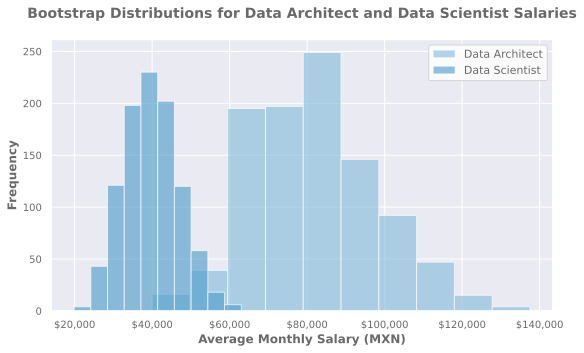

In [ ]:
# Estimating the Effect Size of the mean salary difference
effect_size(DR, DS, "Data Architect", "Data Scientist", alpha = 0.05)

So, from the effect size analysis, it is possible to conclude that the mean salary difference between **Data Architect** and **Data Scientist** positions is, not only statistically significant, but also **practically significant**. 

Certainly, a **difference of $41,875 MXN per month** is huge in the Mexican labor market. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions are very different from each other.



#### **Are the Data Engineer salaries significantly higher than those for Data Scientists?**

To answer this question and the following ones, the **T-test with unequal variance** and the **Mann-Whitney U test** were performed based on the salary observations. Furthermore, a effect size analysis was carried out to estimate the **mean salary difference** between the two data job categories, the corresponding **Cohen's d**; as well as their **bootstrap confidence intervals**.

$$\mathbf{H_0}: \mu_{DE} ≤ \mu_{DS}$$

$$\mathbf{H_1}: \mu_{DE} > \mu_{DS}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Engineer and Data Scientist salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DE, DS, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 0.457; and the p-value is 0.326.

Mann-Whitney U test: The U statistic is 104.500; and the p-value is 0.391.

Test interpretation: Fail to reject H0.


The obtained *p*-values from the T-test and the Mann-Whitney U test were not significant ($p > 0.05$). Therefore, the **Data Engineer** salaries are **not significantly higher** than those for **Data Scientists**.


The mean salary difference between the two data job categories is: $3,458.

The Cohen's d between the two data job categories is: 0.17.
(Small Effect Size)

Data Engineer's Salary --> 95.0% Confidence Interval: ($28,122, $58,216)
Data Scientist's Salary --> 95.0% Confidence Interval: ($27,357, $54,073)




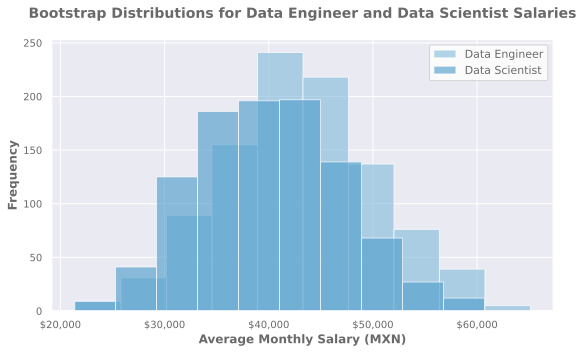

In [ ]:
# Effect size analysis
effect_size(DE, DS, "Data Engineer", "Data Scientist", alpha = 0.05)

From the effect size analysis, it is possible to conclude that the mean salary difference between **Data Engineer** and **Data Scientist** positions is also **practically not significant**. 

Certainly, a **difference of $3,458 MXN per month** is neglectable in the Mexican labor market for technology. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions overlap in a large extent as it is clearly shown in the plot above.

#### **Are the Data Scientist salaries significantly higher than those for Data Analysts?**

$$\mathbf{H_0}: \mu_{DS} ≤ \mu_{DA}$$

$$\mathbf{H_1}: \mu_{DS} > \mu_{DA}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Scientist and Data Analyst salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DS, DA, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 2.829; and the p-value is 0.005.

Mann-Whitney U test: The U statistic is 361.000; and the p-value is 0.001.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Scientists** salaries are **significantly higher** than those for **Data Analysts**.

The mean salary difference between the two data job categories is: $16,562.

The Cohen's d between the two data job categories is: 0.99.
(Large Effect Size)

Data Scientist's Salary --> 95.0% Confidence Interval: ($26,641, $53,718)
Data Analyst's Salary --> 95.0% Confidence Interval: ($17,419, $31,315)




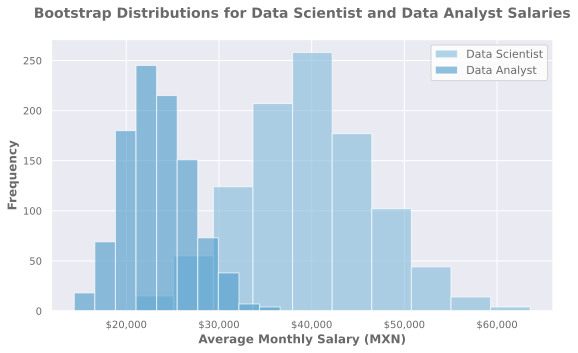

In [ ]:
# Effect size analysis
effect_size(DS, DA, "Data Scientist", "Data Analyst", alpha = 0.05)

From the effect size analysis, it is possible to conclude that the mean salary difference between **Data Scientist** and **Data Analyst** positions is, not only statistically significant, but also **practically significant**. 

Certainly, a **difference of $16,562 MXN per month** is important in the Mexican labor market. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions are different from each other as shown in the plot above.

#### **Are the Data Scientist salaries significantly higher than those for Business Analysts?**


$$\mathbf{H_0}: \mu_{DS} ≤ \mu_{BA}$$

$$\mathbf{H_1}: \mu_{DS} > \mu_{BA}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Scientist and Business Analyst salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DS, BA, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 1.229; and the p-value is 0.117.

Mann-Whitney U test: The U statistic is 72.000; and the p-value is 0.296.

Test interpretation: Fail to reject H0.


The obtained *p*-values from the T-test and the Mann-Whitney U test were not significant ($p > 0.05$). Therefore, the **Data Scientist** salaries are **not significantly higher** than those for **Business Analysts**.

The mean salary difference between the two data job categories is: $7,136.

The Cohen's d between the two data job categories is: 0.44.
(Medium Effect Size)

Data Scientist's Salary --> 95.0% Confidence Interval: ($26,000, $55,502)
Business Analyst's Salary --> 95.0% Confidence Interval: ($25,844, $39,602)




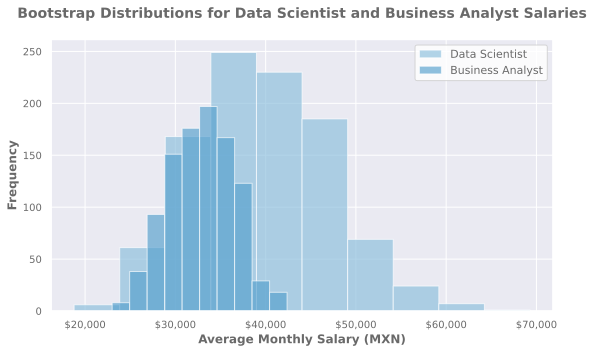

In [ ]:
# Effect size analysis
effect_size(DS, BA, "Data Scientist", "Business Analyst", alpha = 0.05)

In this case, even though the mean salary difference between **Data Scientist** and **Business Analyst** positions is not statistically significant, a **difference of $7,136 MXN per month** is not neglectable as this quantity represents about the <a href="https://www.infobae.com/america/mexico/2022/01/29/cuanto-gana-en-promedio-un-mexicano-y-por-que-30-mil-pesos-no-son-un-sueldito/">national average salary in 2022</a>. 

Therefore, notwithstanding with their lack of statistical significance, based on the effect size analysis, it is possible to state that there is a **significant practical difference** between the mean salary difference of the **Data Scientist** and the **Business Analyst** positions.

#### **Are the Data Architect salaries significantly higher than those for Data Engineers?** 


$$\mathbf{H_0}: \mu_{DR} ≤ \mu_{DE}$$

$$\mathbf{H_1}: \mu_{DR} > \mu_{DE}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Architect and Data Engineer salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DR, DE, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 2.610; and the p-value is 0.018.

Mann-Whitney U test: The U statistic is 73.000; and the p-value is 0.006.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Architects** salaries are **significantly higher** than those for **Data Engineers**.

The mean salary difference between the two data job categories is: $38,417.

The Cohen's d between the two data job categories is: 1.55.
(Large Effect Size)

Data Architect's Salary --> 95.0% Confidence Interval: ($51,667, $116,667)
Data Engineer's Salary --> 95.0% Confidence Interval: ($29,712, $58,861)




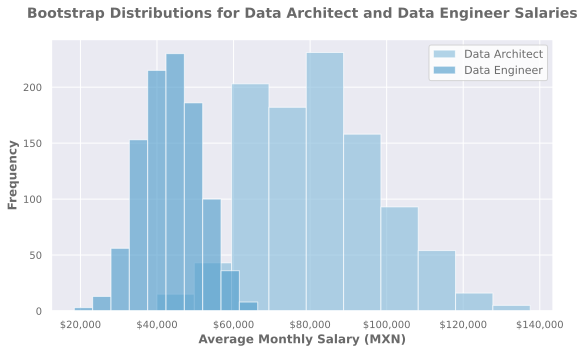

In [ ]:
# Effect size analysis
effect_size(DR, DE, "Data Architect", "Data Engineer", alpha = 0.05)

From the effect size analysis, it is possible to conclude that the mean salary difference between **Data Architect** and **Data Engineer** positions is, not only statistically significant, but also **practically significant**. 

Certainly, a **difference of $38,417 MXN per month** is important in the Mexican labor market. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions are different from each other as shown in the plot above.

#### **Are the Data Engineer salaries significantly higher than those for Business Analysts?**

$$\mathbf{H_0}: \mu_{DE} ≤ \mu_{BA}$$

$$\mathbf{H_1}: \mu_{DE} > \mu_{BA}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Engineer and Business Analyst salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DE, BA, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 1.749; and the p-value is 0.049.

Mann-Whitney U test: The U statistic is 83.500; and the p-value is 0.104.

Inconsistent results between the tests.


The obtained *p*-value from the T-test was significant ($p < 0.05$); whereas the obtained *p*-value from the Mann-Whitney U test was not significant ($p > 0.05$). 

In this context, taking into account that the Data Engineer and Business Analysts salary observations do not follow a normal distribution, the results from the Mann-Whitney U test could be deemed as more accurate. 

Therefore, all in all, the **Data Engineer** salaries are **not significantly higher** than those for **Business Analyst**.

The mean salary difference between the two data job categories is: $10,594.

The Cohen's d between the two data job categories is: 0.63.
(Large Effect Size)

Data Engineer's Salary --> 95.0% Confidence Interval: ($29,096, $57,813)
Business Analyst's Salary --> 95.0% Confidence Interval: ($25,750, $40,200)




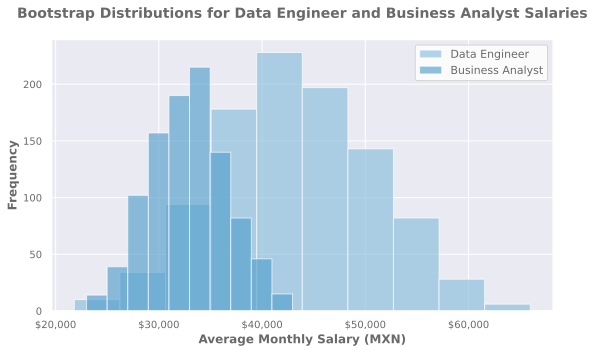

In [ ]:
# Effect size analysis
effect_size(DE, BA, "Data Engineer", "Business Analyst", alpha = 0.05)

In this case, even though the mean salary difference between **Data Engineers** and **Business Analyst** positions is not statistically significant, a **difference of $10,594 MXN per month** is practically significant as this quantity represents more than <a href="https://www.infobae.com/america/mexico/2022/01/29/cuanto-gana-en-promedio-un-mexicano-y-por-que-30-mil-pesos-no-son-un-sueldito/">national average salary in 2022</a>. 

Therefore, notwithstanding with their lack of statistical significance, based on the effect size analysis, it is possible to state that there is a **significant practical difference** between the mean salary difference of the **Data Engineers** and the **Business Analyst** positions.

#### **Are the Data Engineer salaries significantly higher than those for Data Analysts?**

$$\mathbf{H_0}: \mu_{DE} ≤ \mu_{DA}$$

$$\mathbf{H_1}: \mu_{DE} > \mu_{DA}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Data Engineer and Data Analyst salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(DE, DA, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 3.280; and the p-value is 0.002.

Mann-Whitney U test: The U statistic is 365.000; and the p-value is 0.001.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Engineers** salaries are **significantly higher** than those for **Data Analysts**.

The mean salary difference between the two data job categories is: $20,020.

The Cohen's d between the two data job categories is: 1.18.
(Large Effect Size)

Data Engineer's Salary --> 95.0% Confidence Interval: ($29,498, $58,191)
Data Analyst's Salary --> 95.0% Confidence Interval: ($17,125, $31,691)




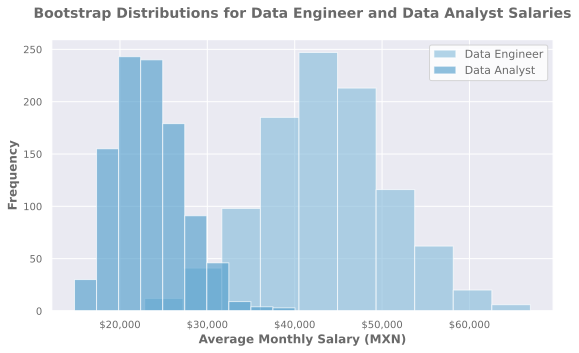

In [ ]:
# Effect size analysis
effect_size(DE, DA, "Data Engineer", "Data Analyst", alpha = 0.05)

From the effect size analysis, it is possible to conclude that the mean salary difference between **Data Engineer** and **Data Analyst** positions is, not only statistically significant, but also **practically significant**. 

Certainly, a **difference of $20,020 MXN per month** is important in the Mexican labor market. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions are different from each other as shown in the plot above.

#### **Are the Business Analysts salaries significantly higher than those for Data Analysts?** 

$$\mathbf{H_0}: \mu_{BA} ≤ \mu_{DA}$$

$$\mathbf{H_1}: \mu_{BA} > \mu_{DA}$$

$$\alpha = 0.05$$

In [ ]:
# Comparing Business Analyst and Data Analyst salaries
stat_t, pvalue_t, stat_u, pvalue_u = compare_means(BA, DA, alternative = 'greater', alpha = 0.05)

T-test: The t statistic is 2.538; and the p-value is 0.009.

Mann-Whitney U test: The U statistic is 239.000; and the p-value is 0.003.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Business Analyst** salaries are **significantly higher** than those for **Data Analysts**.

The mean salary difference between the two data job categories is: $9,426.

The Cohen's d between the two data job categories is: 0.66.
(Large Effect Size)

Business Analyst's Salary --> 95.0% Confidence Interval: ($25,875, $39,627)
Data Analyst's Salary --> 95.0% Confidence Interval: ($17,085, $31,774)




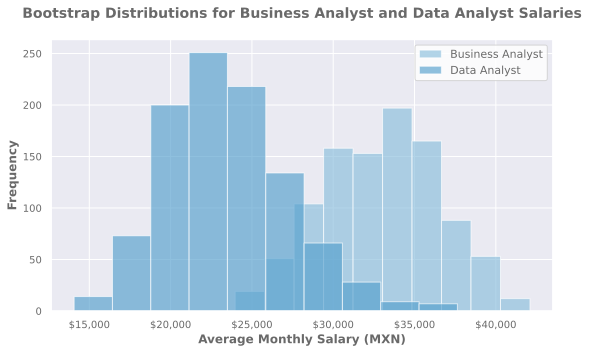

In [ ]:
# Effect size analysis
effect_size(BA, DA, "Business Analyst", "Data Analyst", alpha = 0.05)

From the effect size analysis, it is possible to conclude that the mean salary difference between **Business Analyst** and **Data Analyst** positions is, not only statistically significant, but also **practically significant**. 

Certainly, a **difference of $9,426 MXN per month** is important in the Mexican labor market. And, in this sense, it is noteworthy that the bootstrap confidence intervals for both positions are different from each other as shown in the plot above.

___
## **7. Conclusions** <a class="anchor" id="conclusions"></a>
___

The data job category with **the highest salary** in the Mexican labor market in February 2023 according to the OCC website was **Data Architect**. Indeed, the average salary for Data Architect positions was higher than for both **Data Engineers** and **Data Scientists**. Thus, the present study's hypothesis is rejected.

On the other hand, the data job category **most demanded** in the Mexican labor market was **Data Analyst**; even though it was also the one with **the lowest salary**. Also, this data job category is the most demanded across the different Mexican states, whereas **Data Architect and Data Scientist** positions were the most concentrated in certain locations, namely, Ciudad de México, Nuevo León, and Jalisco.

Moreover, **Ciudad de México** was the location where it is possible to find **the highest jobs demand and the highest salaries**. However, **Nuevo León, Estado de México, and Jalisco** were locations where the demand of data jobs and the salaries offered are the highest after the capital. 

Furthermore, the companies with the greatest demand of data positions were **Manpower**, **Atento Servicios**, **Praxis** and **Softek**; nevertheless, the organizations that offered the highest salaries were **Especialistas en Talento**, **Zemsania México**, **Resources Connection México**, **Zegovia RH**, and **Reclutamiento en Tecnología**, which correspond to recruiting agencies and tech consulting firms.

Additionally, it was also found that the data jobs demand from some companies spread across several Mexican states such as Accenture, Praxis or Softek, and that there are some well-known organizations whose data jobs demand is not located in the capital region, such as HP (Jalisco).

The results of the present study suggest that Data Analyst, Business Analyst, and Data Engineer positions were more demanded across different organizations. On the contrary, Data Scientist and, certainly, Data Architect vacancies could only be found in more specific organizations like tech companies or tech consultancy firms.

Finally, regarding the limitations of the present study, it is important to bear in mind that the data was collected solely from the OCC website and only for a very short period of time. Thus, very few observations were obtained for the least demanded data jobs categories: Data Architect and Business Analyst. Also, the collected data mostly corresponded to Ciudad de México, Nuevo León, Estado de México, and Jalisco, and no distinction was made among entry level, middle and senior positions. Thus, as future perspectives, it would be advisable to gather data from more job websites, retrieve information for a longer time span, make a distinction among entry level, middle and senior positions, and collect more salary data for Data Architect and Business Analyst positions as well as for other Mexican states.

## **8. References** <a class="anchor" id="references"></a>

- **ai-jobs.net (2023).** *Machine Learning Engineer vs. Business Intelligence Data Analyst*. https://ai-jobs.net/insights/machine-learning-engineer-vs-business-intelligence-data-analyst/
- **Arroyo-Velázquez, I. (2022).** *Visualizing Mexican Wildfires. States_MX* [JSON file]. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json.
- **Axis Talent. (2020).** *The Ecosystem of Data Jobs - Making sense of the Data Job Market*. https://www.axistalent.io/blog/the-ecosystem-of-data-jobs-making-sense-of-the-data-job-market
- **Rollins, J. B. (2015).** *Metodología Fundamental para la Ciencia de Datos*. Somers: IBM Corporation. https://www.ibm.com/downloads/cas/WKK9DX51

In [ ]:
# Compressing all figures in a ZIP file
!zip -r figures.zip Figures

  adding: Figures/ (stored 0%)
  adding: Figures/Fig8_DemandPerCompanyAndLocationPX.svg (deflated 72%)
  adding: Figures/Fig4_DemandPerLocationAndDataJobCategoryMPL.png (deflated 18%)
  adding: Figures/Fig_BootstrapDistributions_Data Architect-Data Engineer_MPL.png (deflated 19%)
  adding: Figures/Fig3_DemandPerDataJobCategoryInTheMostImportantLocationsPX.png (deflated 27%)
  adding: Figures/Fig14_SalaryPerCompanyAndDataJobCategoryPX.png (deflated 15%)
  adding: Figures/Fig13_Top20SalaryPerCompanyMPL.png (deflated 17%)
  adding: Figures/Fig9_NumberOfSalaryObservationsPerDataJobCategoryPX.svg (deflated 83%)
  adding: Figures/Fig15_DataJobsSalaryDistributionMPL.png (deflated 26%)
  adding: Figures/Fig_BootstrapDistributions_Business Analyst-Data Analyst_MPL.png (deflated 19%)
  adding: Figures/Fig14_SalaryPerCompanyAndDataJobCategoryMPL.png (deflated 18%)
  adding: Figures/Fig10_AverageSalaryPerDataJobCategoryMPL.png (deflated 20%)
  adding: Figures/Fig4_DemandPerLocationAndDataJobCatego

In [ ]:
# Code for composing the Python Requirements File

def get_imported_packages():
    """
    Function to get imported packages to current notebook.

    Parameters

    None

    Returns

    modules: List of imported packages
    """
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}

    imported_modules = set(sys.modules.keys())
    
    #imported_modules.remove('pip')

    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]

    return modules


def generate_requirements(filepath:str, modules):
    """
    Function to print a set of packages into a text file.

    Parameters

    filepath: String with the name of the output text file 
    modules: List of the packages to be printed in the output text file

    Returns

    None
    """
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}\n")


generate_requirements('requirements.txt', get_imported_packages())

In [ ]:
# End